# KC House Pricing Model
***
**Authors:**
- Bradley Ouko
- Philip Oluoch
- Lynn Komen
- Ivyne Atieng
- Nashon Okumu
- Claudia Sagini
- Simon Makumi
- Amani Wanene
- Catherine Wangui 
***

<p align="center">
    <img src="Interstate 5 North - King County South - AARoads - Washington.jpeg" alt="Interstate 5 North - King County South - AARoads - Washington" width="700" height="450" />
</p>

# Introduction

Welcome to our vibrant real estate team based in King County! We're on a mission to revolutionize the way homeowners navigate the dynamic world of buying and selling properties. 

### Our Passion

Imagine a bustling market where homes are more than just structures; they're dreams fulfilled, investments secured, and futures shaped. Our passion is to empower homeowners like you with the insights and tools needed to navigate this exciting journey with confidence and clarity. 

### Your Trusted Guides

In King County, where the real estate landscape is ever-evolving, we're here to be your trusted guides, your partners in prosperity. 

Let's dive into the heart of the matter:

# Overview
---
### Project Focus

>  * Our real estate project focuses on empowering homeowners in northwestern King County by providing actionable insights for buying and selling homes.

### Goals

> * Empowerment: Equip homeowners with the insights and tools needed to navigate the real estate market confidently.
> * Value Optimization: Maximize the value of properties through innovative strategies and personalized guidance.
> * Transparency: Provide transparent and data-driven insights to ensure informed decision-making for both buyers and sellers.

### Significance

> * In a rapidly evolving real estate market like King County, informed decision-making is key to success. Our project aims to revolutionize the home buying and selling experience by leveraging data-driven insights and innovative approaches.

## The Business Problem
---
### Understanding the Market Dynamics

> * In King County, there's a rising market of home-buyers and home-sellers, indicating a vibrant real estate landscape. However, navigating this market can be daunting for homeowners who are unsure about the key factors driving house prices. 

### Lack of Actionable Insights

> * Many homeowners struggle to determine the optimal pricing strategies for their properties. Without actionable insights, they may underprice or overprice their homes, potentially missing out on maximizing their sale potential.

### Uncertainty for Home Buyers

> * On the other hand, home buyers face challenges in estimating the value of properties based on their preferences. They often lack guidance on the approximate price of houses that align with their desired features and budget.

### Our Mission: Empowering Homeowners and Home Buyers

> * This is where our project comes in. We aim to empower homeowners with actionable insights on the key factors driving house prices in King County. By identifying these influential features, we enable informed pricing strategies and property enhancements, maximizing sale potential in the dynamic real estate market.
> * For home buyers, our project offers personalized advice on the approximate price of houses based on their preferred choice of features, helping them make informed decisions in their property search journey.
> * Let's delve deeper into how we're tackling these challenges and revolutionizing the King County real estate landscape.


# Data Understanding
***
### Data Source

> * Our primary dataset, the King County House Sales dataset, serves as the foundation of our analysis. This dataset contains information on various properties sold in King County, Washington. It includes details such as property features, sale prices, and sales history. This dataset is central to our analysis as it provides insights into the factors influencing house prices in the area.

### Data Representation

> * The King County House Sales dataset represents information about house sales in King County, Washington. Each row represents a single house sale transaction, with various attributes recorded for each property. The dataset provides a comprehensive view of house sales in King County, including details about the properties sold and their associated attributes.

### Target Variable

> * In the King County House Sales dataset, the target variable is the "price" column, representing the sale price of the houses. The goal of our analysis is to predict house prices based on various features such as square footage, number of bedrooms, bathrooms, location, and other relevant attributes. Therefore, the "price" variable is the main focus of our analysis, and regression models will be trained to predict this target variable.

Before proceeding with analysis, we'll need to clean and preprocess the data to address any missing values, outliers, and inconsistencies. This may involve techniques such as imputation, outlier detection, and feature engineering to ensure the quality and integrity of the dataset.

Let's now move on to explore how we'll leverage this data to address the business problem and achieve our project goals.

#### Importing the necessary libraries and exploring the data

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
data = pd.read_csv('data/kc_house_data.csv')

In [3]:
# Displaying the first rows
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [4]:
# Data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Summary statistics
data.describe().transpose()

count          mean           std           min  \
id             21597.0  4.580474e+09  2.876736e+09  1.000102e+06   
price          21597.0  5.402966e+05  3.673681e+05  7.800000e+04   
bedrooms       21597.0  3.373200e+00  9.262989e-01  1.000000e+00   
bathrooms      21597.0  2.115826e+00  7.689843e-01  5.000000e-01   
sqft_living    21597.0  2.080322e+03  9.181061e+02  3.700000e+02   
sqft_lot       21597.0  1.509941e+04  4.141264e+04  5.200000e+02   
floors         21597.0  1.494096e+00  5.396828e-01  1.000000e+00   
sqft_above     21597.0  1.788597e+03  8.277598e+02  3.700000e+02   
yr_built       21597.0  1.971000e+03  2.937523e+01  1.900000e+03   
yr_renovated   17755.0  8.363678e+01  3.999464e+02  0.000000e+00   
zipcode        21597.0  9.807795e+04  5.351307e+01  9.800100e+04   
lat            21597.0  4.756009e+01  1.385518e-01  4.715590e+01   
long           21597.0 -1.222140e+02  1.407235e-01 -1.225190e+02   
sqft_living15  21597.0  1.986620e+03  6.852305e+02  3.990000e+02   
sqft_lot15     21597.0  1.275828e+04  2.727444e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.220000e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068500e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747110e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222310e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

In [6]:
# Shape of Data
data.shape

(21597, 21)

In [7]:
# Column names 
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Observations

> Upon initial exploration of the data, we've made several key observations:

- There is a wide range of property types and sizes represented in the dataset, from small condos to large single-family homes.
- The dataset contains information on various property features such as square footage, number of bedrooms and bathrooms, and location.
- The "price" variable, representing the sale price of the houses, shows variations across different properties.
- Further preprocessing is required to understand the relationships between different features and house prices.

# Data Preparation
***
> This section involves the process of cleaning, transforming, and organizing raw data into a structured format suitable for analysis, modeling, and visualization.

## 1. Data Cleaning

### 1.1  Address Missing values and Duplicates 

#### 1.1.1 Check for missing values

In [8]:
# Check for missing values and their respective columns
missing_values = data.isna().sum()    
print(missing_values)
print("====================================")
print("List of columns with missing values:")
print("====================================")
missing_values[missing_values > 0].index.tolist()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64
List of columns with missing values:


['waterfront', 'view', 'yr_renovated']

> The columns `waterfront`, `view` and `yr_renovated` contain missing values. We drop them since they can compromise the integrity of the dataset, potentially leading to biased analysis or inaccurate results.

#### 1.1.2 Drop entries with missing values

In [9]:
# Drops rows with any null values
data.dropna(inplace = True)
data.shape

(15762, 21)

#### 1.1.3 Check for duplicates

In [10]:
# Check for duplicates that might affect the data
duplicates = data.duplicated().unique().sum
print("There are {} duplicates from the data.".format(duplicates()))

There are 0 duplicates from the data.


#### 1.1.4 Drop columns

In [11]:
# Drop columns not applicable in this analysis
col_dropped = data[['id']]
for col in col_dropped:
    data.drop(columns = col ,inplace = True)
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 1.2 Update columns

#### 1.2.1 Change `yr_renovated` into an integer

In [12]:
# Change year to integer
data['yr_renovated'] = data['yr_renovated'].astype(int)
data['yr_renovated'].dtype

dtype('int32')

#### 1.2.2 Change `date` column into date format(yyyy/mm/dd)

In [13]:
# Date into date format(YYYY-MM-DD)
data['date'] = pd.to_datetime(data['date'])
print(f"{data['date'].dtype}")

datetime64[ns]


#### 1.2.3 Change `sqft_basement` into a float

In [14]:
# preview sqft_basement values
data['sqft_basement'].unique()

array(['400.0', '910.0', '0.0', '1530.0', '?', '730.0', '300.0', '970.0',
       '760.0', '720.0', '820.0', '780.0', '790.0', '330.0', '1620.0',
       '360.0', '588.0', '1510.0', '990.0', '600.0', '550.0', '1000.0',
       '1600.0', '1700.0', '500.0', '700.0', '1040.0', '1010.0', '240.0',
       '290.0', '800.0', '540.0', '560.0', '840.0', '770.0', '570.0',
       '1490.0', '620.0', '650.0', '180.0', '1130.0', '450.0', '1640.0',
       '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0', '1310.0',
       '630.0', '2000.0', '390.0', '210.0', '1950.0', '440.0', '220.0',
       '1160.0', '580.0', '2060.0', '1820.0', '1180.0', '380.0', '1150.0',
       '1200.0', '680.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0',
       '870.0', '1250.0', '1100.0', '1400.0', '530.0', '490.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.0', '270.0',
       '350.0', '935.0', '200.0', '850.0', '1470.0', '160.0', '950.0',
       '1370.0', '460.0', '50.0', '710.0', '1900.0', 

#### 1.2.4 Change the `?` values into `np.nan` then drop the missing values.
> First deal with the missing values.

In [15]:
# Convert values with ? 
data['sqft_basement'] = data['sqft_basement'].replace('?', np.nan)

print(data['sqft_basement'].head())
missing_values_count = data['sqft_basement'].isnull().sum()
print(f"Number of missing values: {missing_values_count}")

# Drop the missing values
data.dropna(inplace=True)
missing_values_count = data['sqft_basement'].isnull().sum()
print(f"Number of missing values: {missing_values_count}")

1     400.0
3     910.0
4       0.0
5    1530.0
6       NaN
Name: sqft_basement, dtype: object
Number of missing values: 333
Number of missing values: 0


#### 1.2.5 Change into a float

In [16]:
data['sqft_basement'] = data['sqft_basement'].astype(float)
data['sqft_basement'].dtype

dtype('float64')

#### 1.2.6 Change `grade` into an integer 

In [17]:
# Modify the grade column to have only the grade value.
data.loc[:, 'grade'] = data['grade'].str.split(' ').str[0]

# Changing the data type of grade from str to int
data.loc[:, 'grade'] = data['grade'].astype(np.int64)
data['grade'].unique()

array([ 7,  8, 11,  9,  6,  5, 10, 12,  4,  3, 13], dtype=int64)

## 2. Feature Engineering
### 2.1 Map `views` and `condition` into a numerical scale
**Note:**`views` & `condition` are **ordinal** variables. This means they are **ranked** in a specific order: 0 - 4

In [18]:
# Create a dictionary rating_map for mapping
rating_map = {
                'NONE': 0,
                'FAIR': 1,
                'AVERAGE': 2,
                'GOOD': 3,
                'EXCELLENT': 4,
                'Poor': 0,
                'Fair': 1,
                'Average': 2,
                'Good': 3,
                'Very Good': 4
}
data['view_rating'] = data['view'].map(rating_map)
data['condition_rating'] = data['condition'].map(rating_map)
print(data['view_rating'].unique())
data['condition_rating'].unique()

[0 3 4 2 1]


array([2, 4, 3, 0, 1], dtype=int64)

### 2.2 Create a new feature `yrs_since_renovation`

In [19]:
# Get the current year using Pandas Timestamp
current_year = pd.Timestamp.now().year

# Define a function to calculate years since renovation or years since built
def calculate_years_since_renovation(row):

    if row['yr_renovated'] < 1:
        return current_year - row['yr_built']
    else:
        return current_year - row['yr_renovated']

# Apply the function to each row in the DataFrame along the specified axis and store the result in a new column 'yrs_since_renovated'
data['yrs_since_renovation'] = data.apply(calculate_years_since_renovation, axis=1)
data['yrs_since_renovation'].info()

<class 'pandas.core.series.Series'>
Int64Index: 15429 entries, 1 to 21596
Series name: yrs_since_renovation
Non-Null Count  Dtype
--------------  -----
15429 non-null  int64
dtypes: int64(1)
memory usage: 241.1 KB


### 2.3 Create a new feature `age_of_house`
> We are going to explore this feature later on during modeling.

In [20]:
data['age_of_house'] = data['date'].dt.year - data['yr_built']
data['age_of_house'].info()

<class 'pandas.core.series.Series'>
Int64Index: 15429 entries, 1 to 21596
Series name: age_of_house
Non-Null Count  Dtype
--------------  -----
15429 non-null  int64
dtypes: int64(1)
memory usage: 241.1 KB


### 2.4 Create a new feature `city` from the feature `zipcode`

In [21]:
print(len(data['zipcode'].unique()))
zip_to_city = {
    98125: 'Seattle',
    98136: 'Seattle',
    98074: 'Sammamish',
    98146: 'Seattle',
    98038: 'Maple Valley',
    98115: 'Seattle',
    98107: 'Seattle',
    98126: 'Seattle',
    98019: 'Duvall',
    98103: 'Seattle',
    98003: 'Federal Way',
    98133: 'Seattle',
    98092: 'Auburn',
    98030: 'Kent',
    98002: 'Auburn',
    98112: 'Seattle',
    98052: 'Redmond',
    98027: 'Issaquah',
    98117: 'Seattle',
    98058: 'Renton',
    98001: 'Auburn',
    98056: 'Newcastle',
    98166: 'Seattle',
    98119: 'Seattle',
    98023: 'Auburn',
    98007: 'Bellevue',
    98070: 'Vashon',
    98148: 'Burien',
    98105: 'Seattle',
    98042: 'Covington',
    98059: 'Renton',
    98122: 'Seattle',
    98144: 'Seattle',
    98004: 'Bellevue',
    98034: 'Kirkland',
    98075: 'Sammamish',
    98118: 'Seattle',
    98199: 'Seattle',
    98040: 'Mercer Island',
    98032: 'Kent',
    98045: 'North Bend',
    98102: 'Seattle',
    98077: 'Woodinville',
    98198: 'Seatac',
    98108: 'Seattle',
    98178: 'Seattle',
    98177: 'Seattle',
    98029: 'Issaquah',
    98006: 'Bellevue',
    98109: 'Seattle',
    98022: 'Enumclaw',
    98033: 'Kirkland',
    98155: 'Seattle',
    98024: 'Fall City',
    98168: 'Seattle',
    98011: 'Bothell',
    98031: 'Kent',
    98053: 'Redmond',
    98010: 'Black Diamond',
    98106: 'Seattle',
    98028: 'Kenmore',
    98072: 'Woodinville',
    98188: 'Seatac',
    98065: 'Snoqualmie',
    98005: 'Bellevue',
    98008: 'Bellevue',
    98055: 'Renton',
    98116: 'Seattle',
    98014: 'Carnation',
    98039: 'Medina'
}
print(len(zip_to_city))

data['city'] = data['zipcode'].map(zip_to_city)

print(data['city'].unique())

70
70
['Seattle' 'Sammamish' 'Redmond' 'Maple Valley' 'Duvall' 'Federal Way'
 'Mercer Island' 'Auburn' 'Kent' 'Issaquah' 'Renton' 'Newcastle'
 'Bellevue' 'Vashon' 'Burien' 'Covington' 'Kirkland' 'North Bend'
 'Woodinville' 'Seatac' 'Enumclaw' 'Fall City' 'Bothell' 'Black Diamond'
 'Kenmore' 'Snoqualmie' 'Carnation' 'Medina']


## 3. Handling Outliers
### 3.1 Visualizing the data
> Let's start by creating boxplots to have a feel of the data.

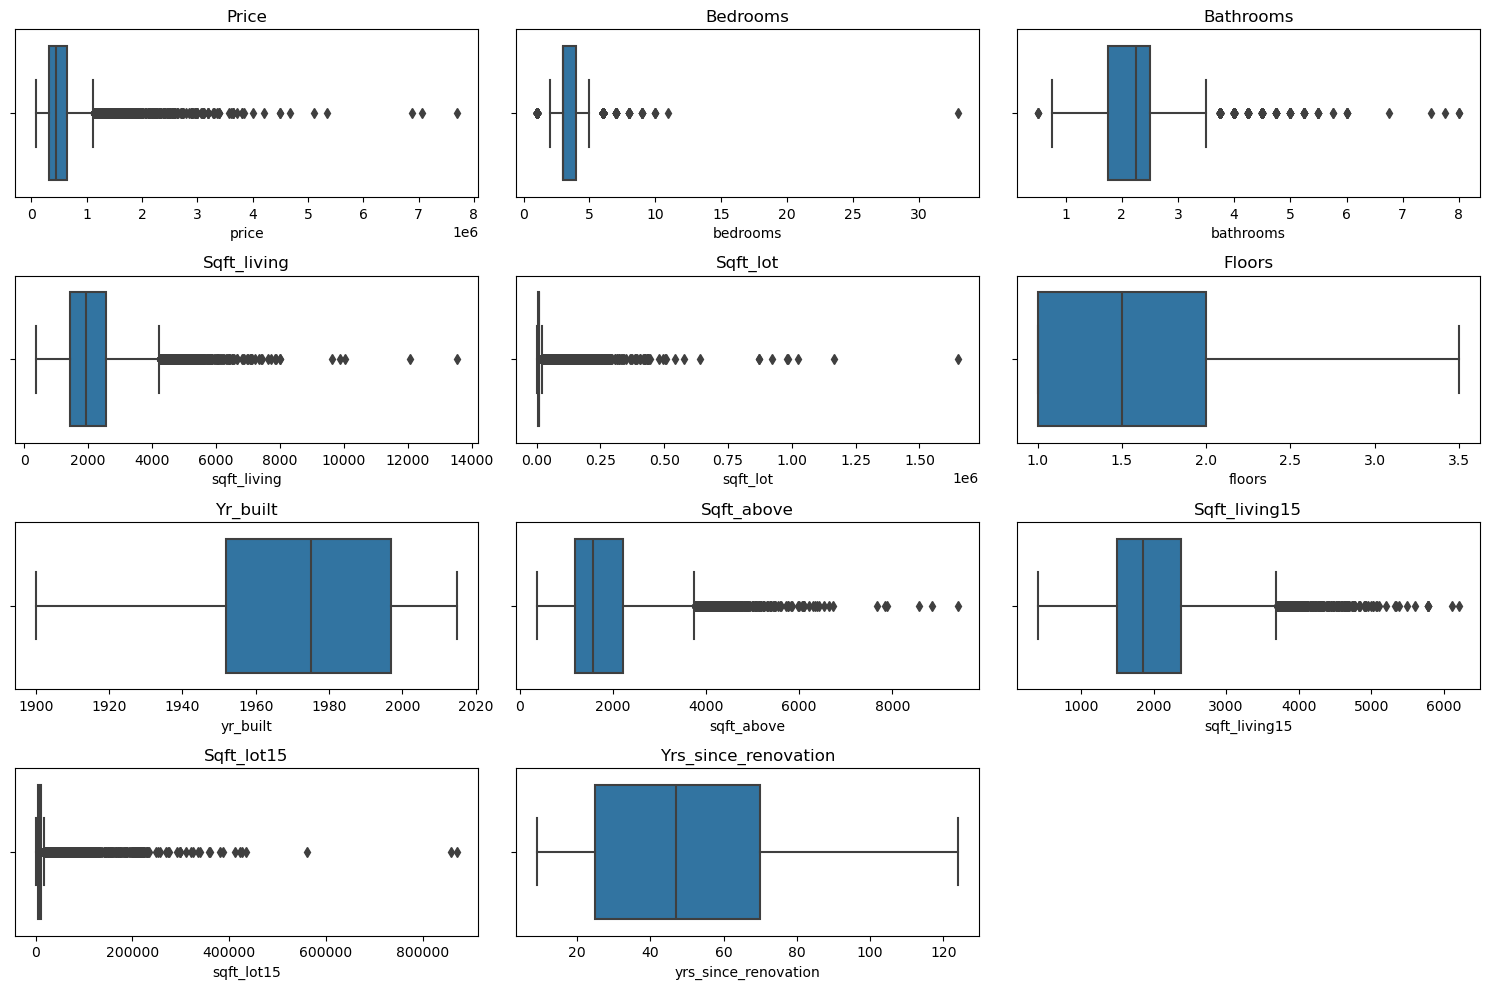

In [23]:
# Selecting numeric columns
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                   'yr_built', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'yrs_since_renovation']

# Create box plots for all numeric columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'{column.capitalize()}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

> It is evident that most of the features have outliers in them. Outliers can lead to incorrect inferences and conclusions about the underlying relationship between variables. They also violate the assumptions of normality and linearity, so we remove them.

### 3.2 Removing outliers

In [24]:
# Function to find upper and lower limits for our features
def find_outlier_limits(column, num_std=3):
    
    mean = np.mean(column)
    std_dev = np.std(column)
    
    lower_limit = mean - num_std * std_dev
    upper_limit = mean + num_std * std_dev
    
    return lower_limit, upper_limit

# Function to filter outliers
def filter_outliers(data, num_std=3,exclude_columns = []):
    
    filtered_data = data.copy()

    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]) and col not in exclude_columns:
            lower_limit, upper_limit = find_outlier_limits(data[col], num_std)
            print(f"{col}\n-----------------\nLower Limit: {lower_limit}, Upper Limit: {upper_limit}")
            outliers_removed = data[(data[col] < lower_limit) | (data[col] > upper_limit)].shape[0]
            print(f"Outliers removed in column '{col}': {outliers_removed}")
            print("===============================================================================\n")
            outliers_mask = (data[col] < lower_limit) | (data[col] > upper_limit)
            
            filtered_data = filtered_data[~outliers_mask]
    
    return filtered_data


columns_to_exclude = ['view_rating', 'yr_built', 'yr_renovated','price', 'grade', 'waterfront', 'zipcode', 'city', 'lat', 'long']
clean_data = filter_outliers(data,num_std = 3, exclude_columns = columns_to_exclude)
print('Original data:', len(data))
print(f"Filtered data: {len(clean_data)}")
print("\n===============================================================================")

bedrooms
-----------------
Lower Limit: 0.5762569078209379, Upper Limit: 6.181277605109258
Outliers removed in column 'bedrooms': 43

bathrooms
-----------------
Lower Limit: -0.1794986487457817, Upper Limit: 4.422515046438438
Outliers removed in column 'bathrooms': 133

sqft_living
-----------------
Lower Limit: -673.041761831078, Upper Limit: 4844.074881281464
Outliers removed in column 'sqft_living': 177

sqft_lot
-----------------
Lower Limit: -110701.86284098103, Upper Limit: 141274.18275802038
Outliers removed in column 'sqft_lot': 256

floors
-----------------
Lower Limit: -0.1221005018527288, Upper Limit: 3.111211915424574
Outliers removed in column 'floors': 6

sqft_above
-----------------
Lower Limit: -693.7102422541473, Upper Limit: 4281.12070307468
Outliers removed in column 'sqft_above': 184

sqft_basement
-----------------
Lower Limit: -1038.2440259879004, Upper Limit: 1621.866684617753
Outliers removed in column 'sqft_basement': 177

sqft_living15
-----------------
Lower

### 3.3 Checking for Normal Distribution

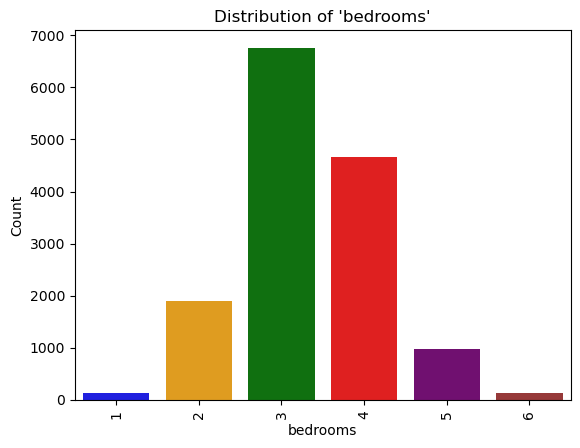

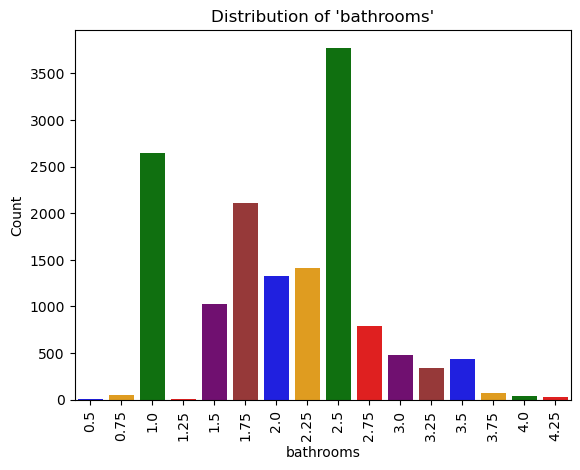

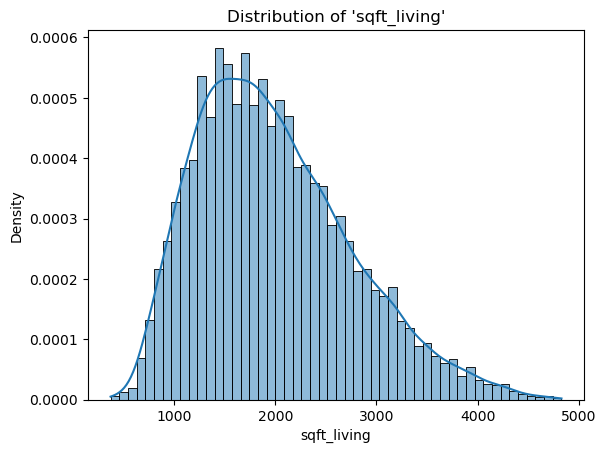

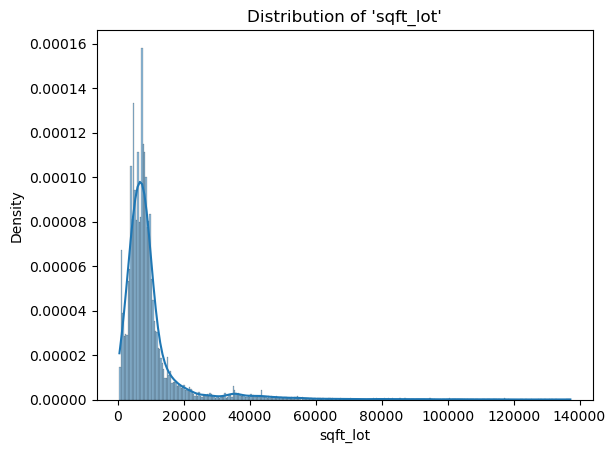

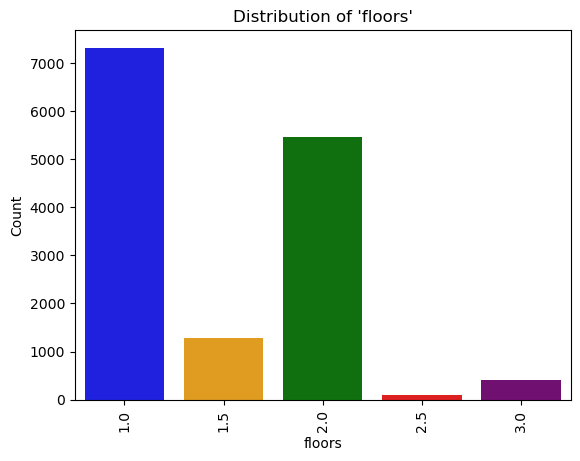

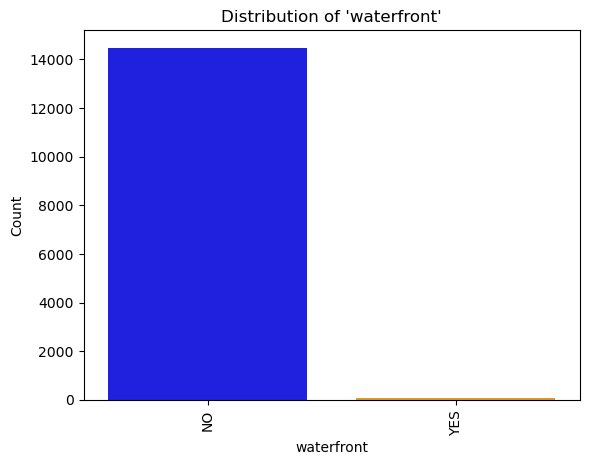

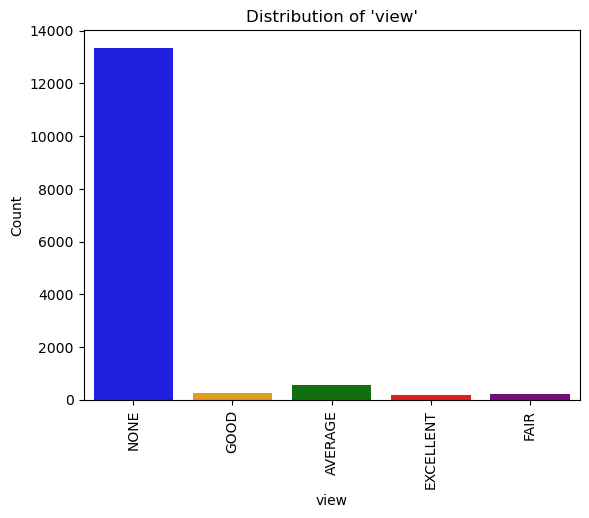

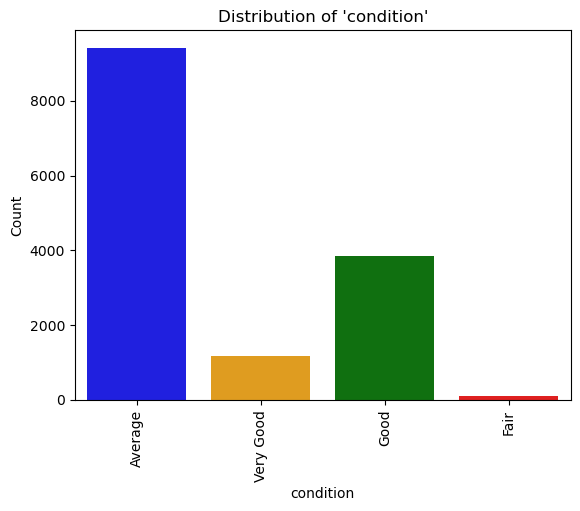

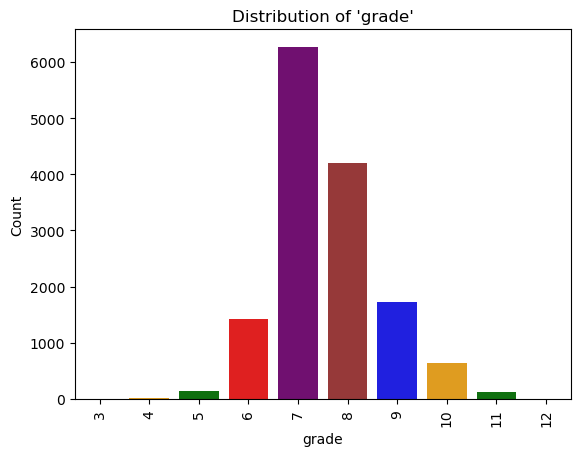

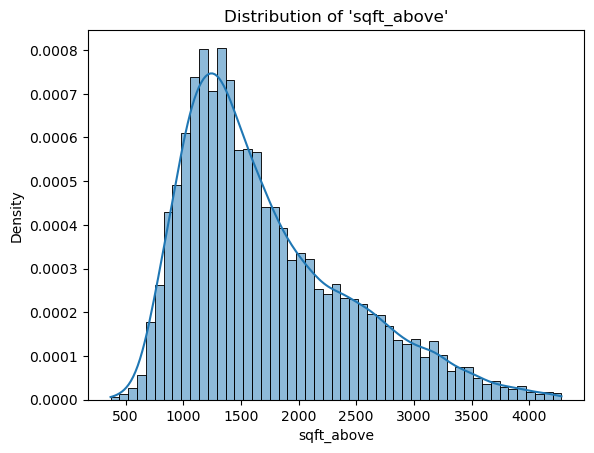

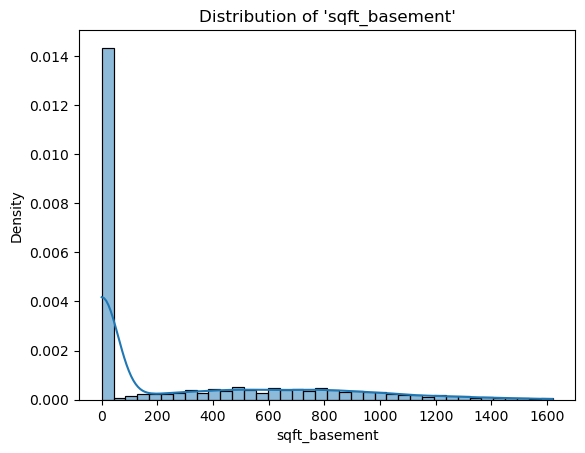

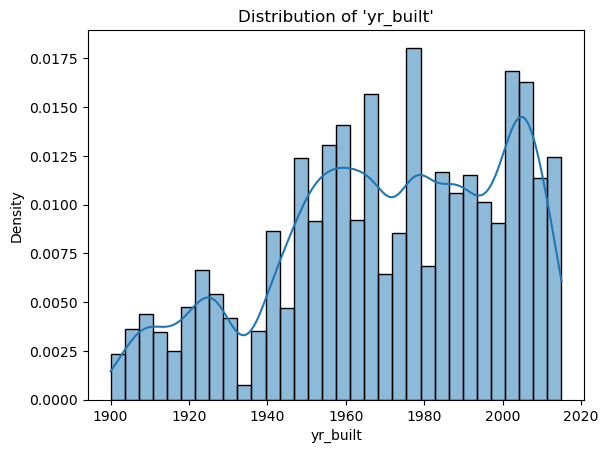

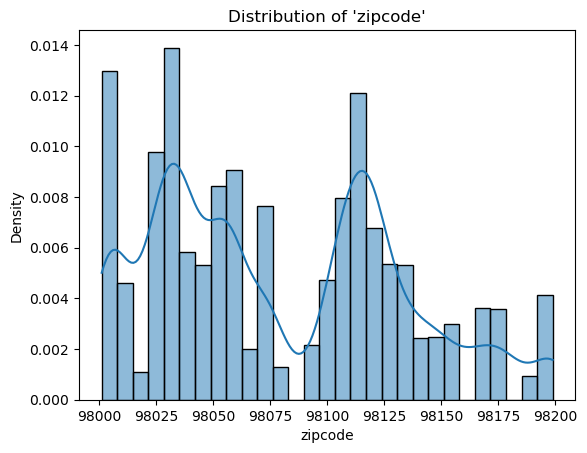

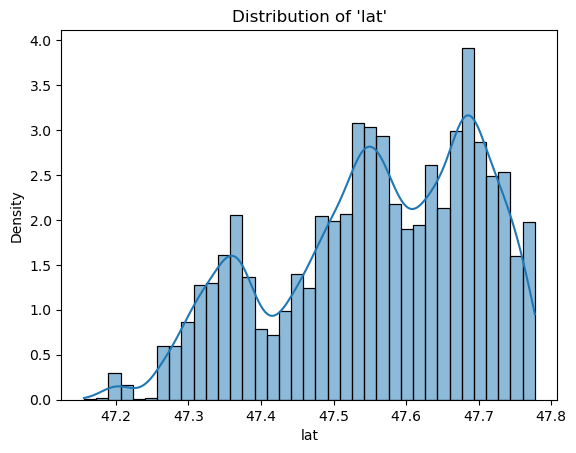

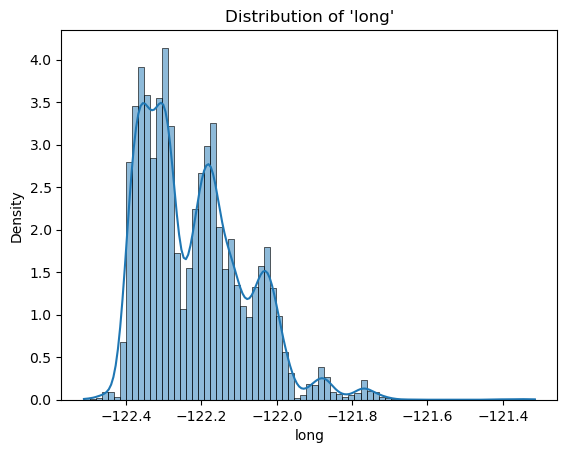

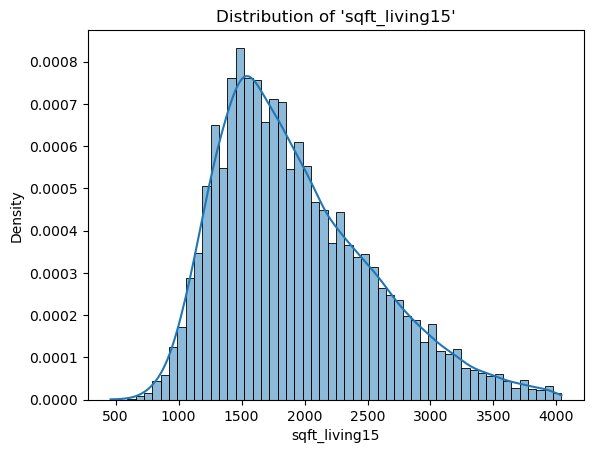

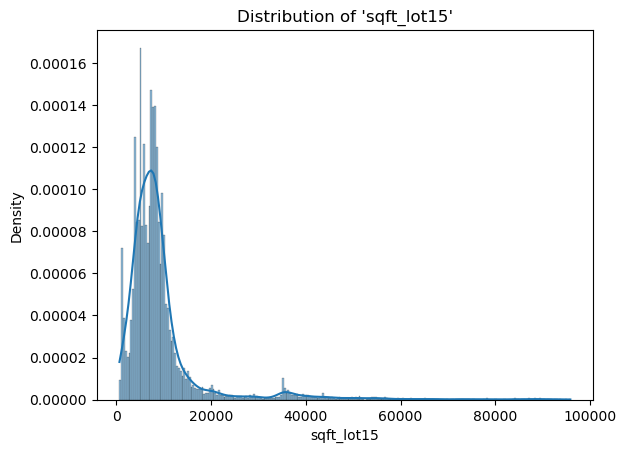

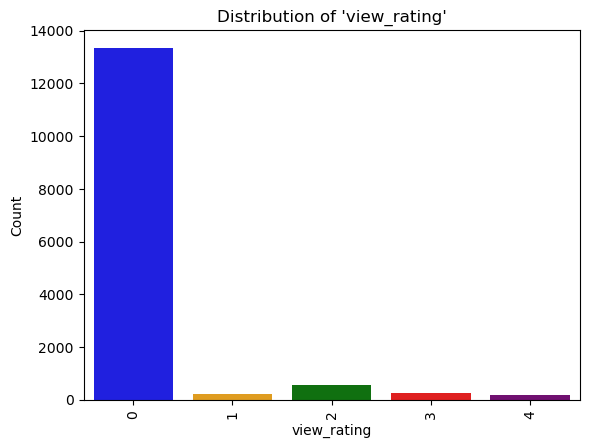

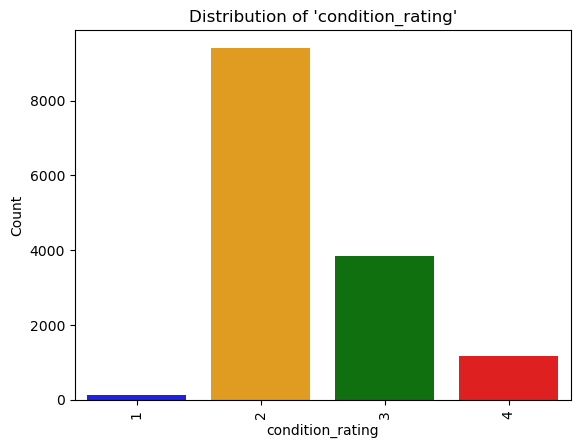

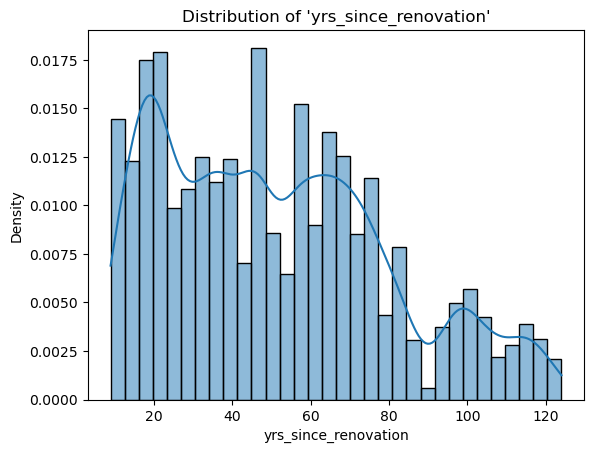

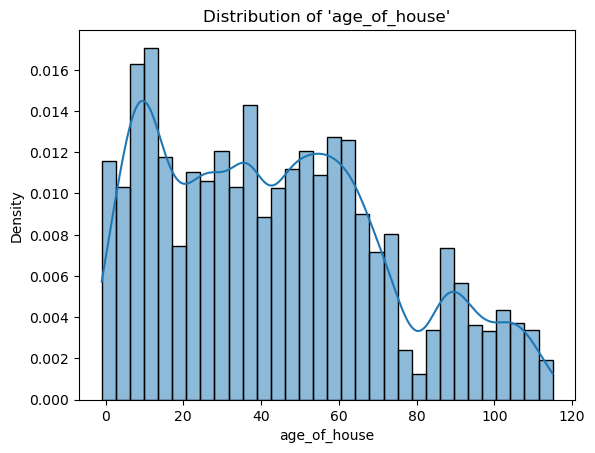

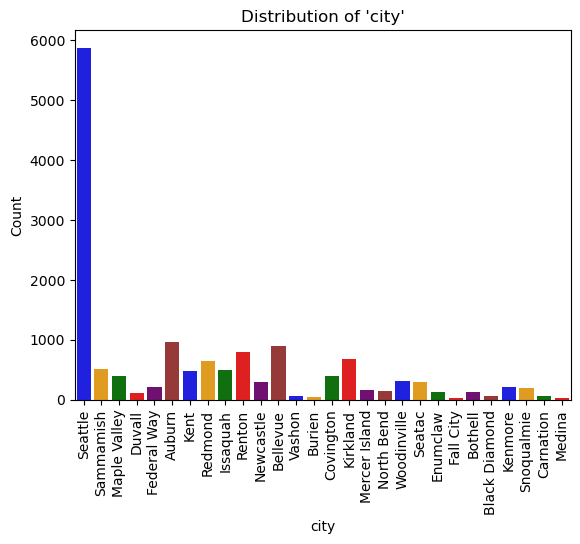

In [25]:
# Check for normal distribution
def check_normal_distribution(data,exclude_columns=[]):
   
    for col in clean_data.columns:
        if clean_data[col].dtype == 'object' or clean_data[col].nunique() < 20:
            # If the column is categorical or has less than 20 unique values, use countplot
            custom_palette = ["blue", "orange", "green", "red","purple","brown"]
            sns.countplot(data=clean_data, x=col,palette=custom_palette)
            plt.title(f"Distribution of '{col}'")
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=90) 
            plt.show()
        elif pd.api.types.is_numeric_dtype(clean_data[col]) and col not in exclude_columns:
            sns.histplot(clean_data[col], kde=True, stat="density")
            plt.title(f"Distribution of '{col}'")
            plt.xlabel(col)
            plt.ylabel('Density')
            plt.show()


exclude = ['price','yr_renovated', 'view_rating', 'condition_rating' , 'waterfront_bool']
check_normal_distribution(clean_data,exclude_columns=exclude)

# Data Analysis
***
> Let us perform data analysis to extract insights which we can use to answer the research questions we formulated at the beginning.

## 1. Bivariate & Correlation Analysis

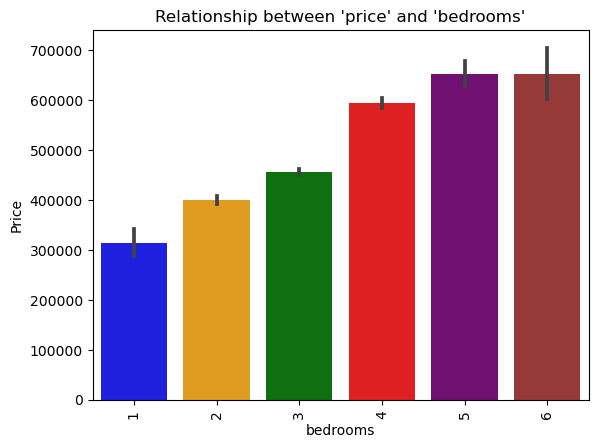

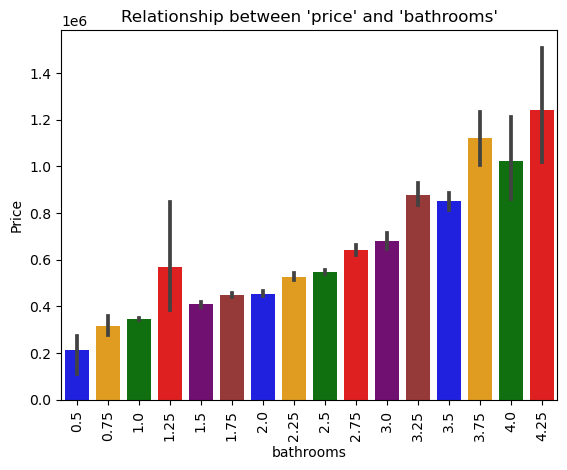

Correlation coefficient between 'price' and 'sqft_living': 0.6356935724736175


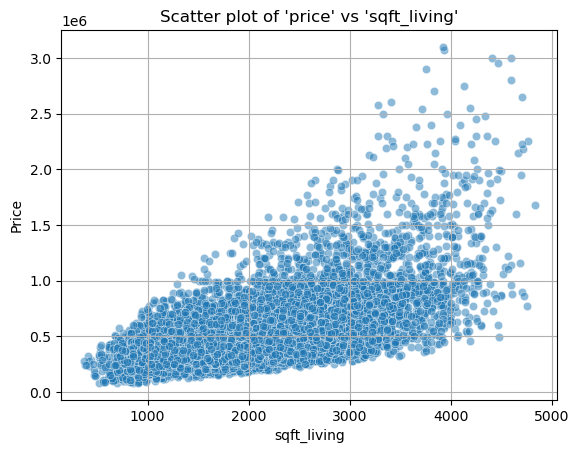

Correlation coefficient between 'price' and 'sqft_lot': 0.09406070529427626


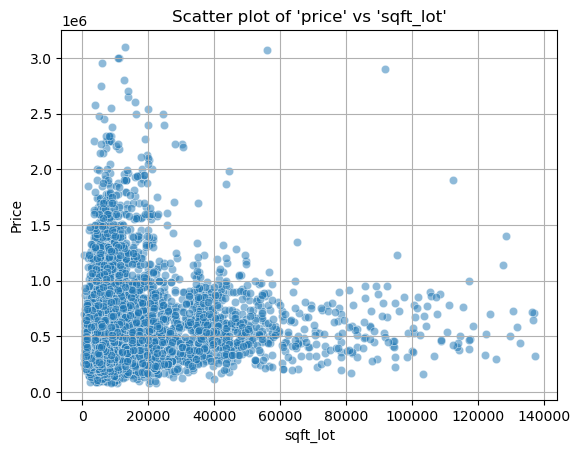

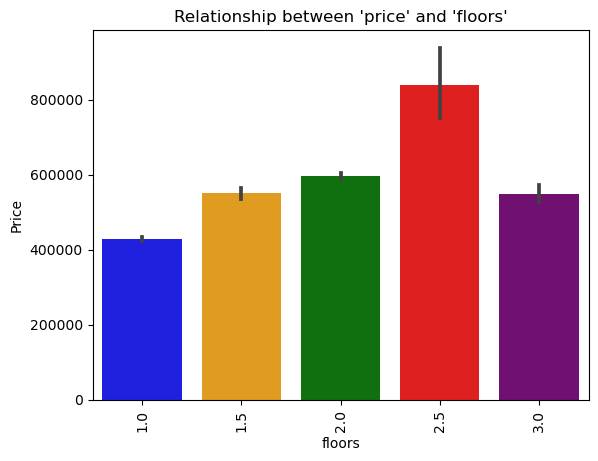

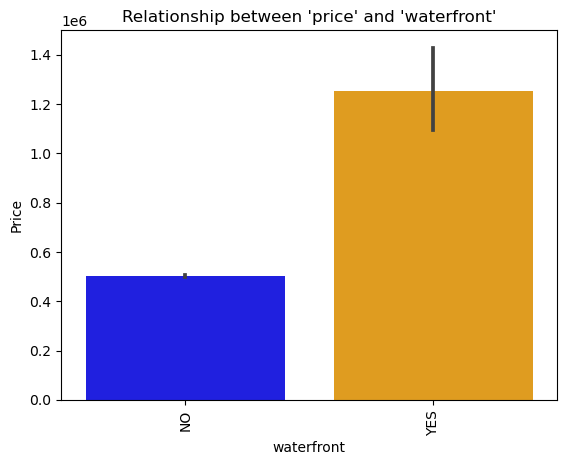

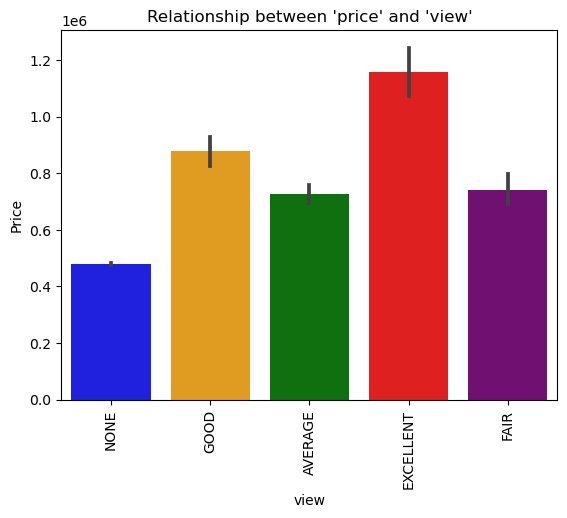

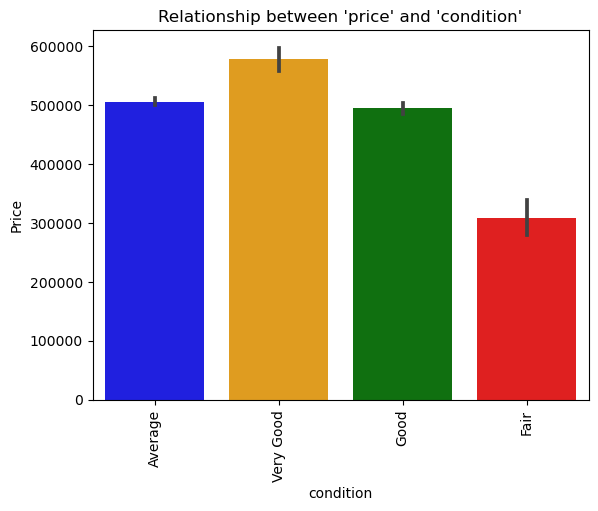

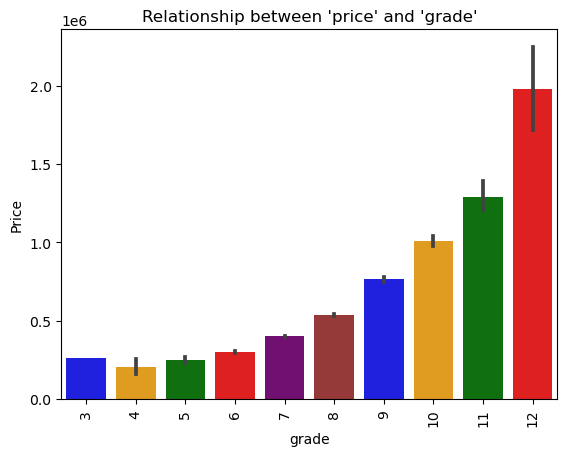

Correlation coefficient between 'price' and 'sqft_above': 0.5345736577367847


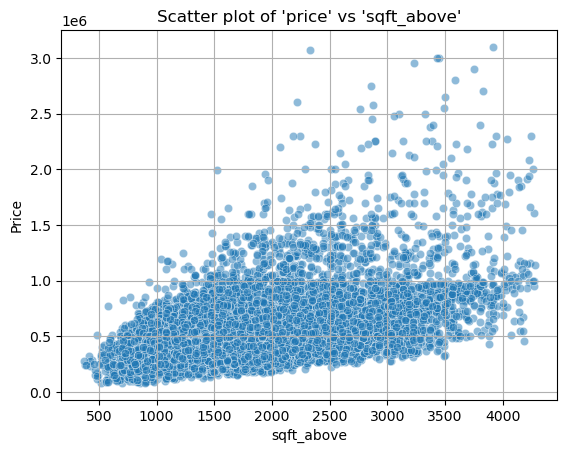

Correlation coefficient between 'price' and 'sqft_basement': 0.2525262464928534


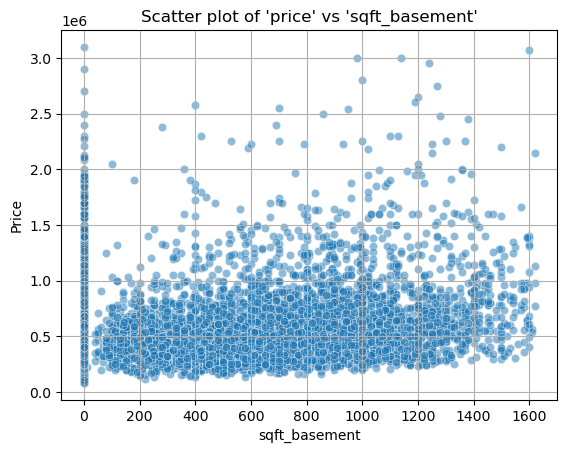

Correlation coefficient between 'price' and 'yr_built': 0.01885148630171255


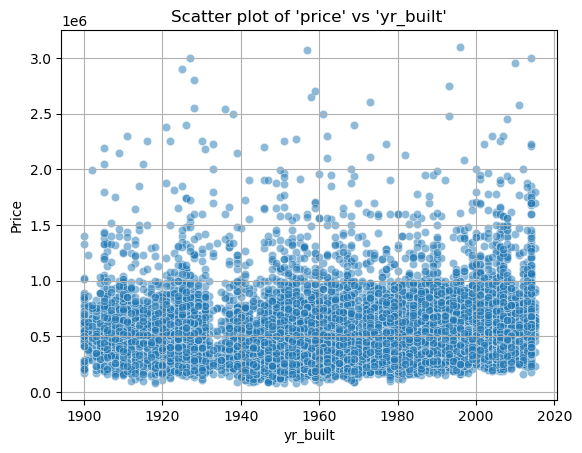

Correlation coefficient between 'price' and 'sqft_living15': 0.5561823644443877


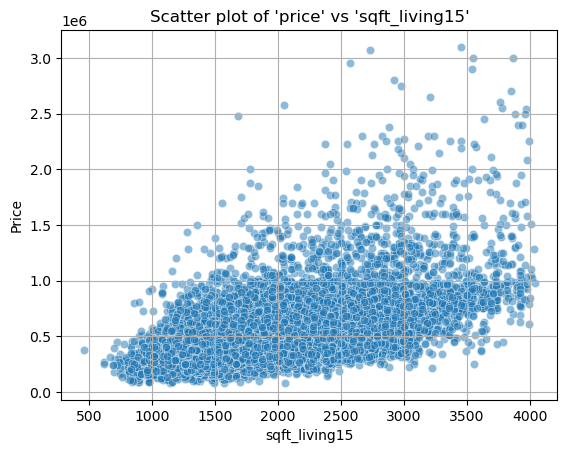

Correlation coefficient between 'price' and 'sqft_lot15': 0.08490012088911118


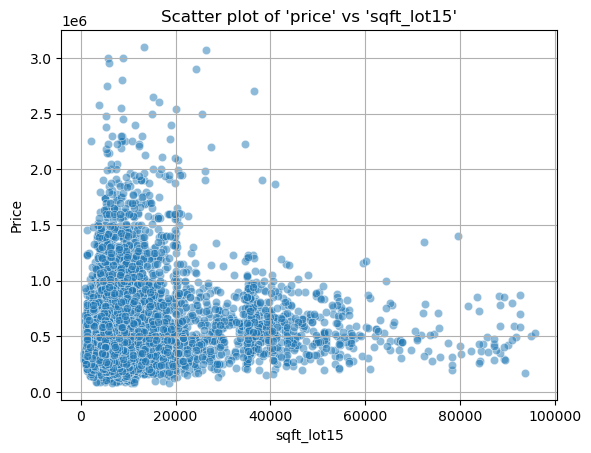

Correlation coefficient between 'price' and 'yrs_since_renovation': -0.0697252413842053


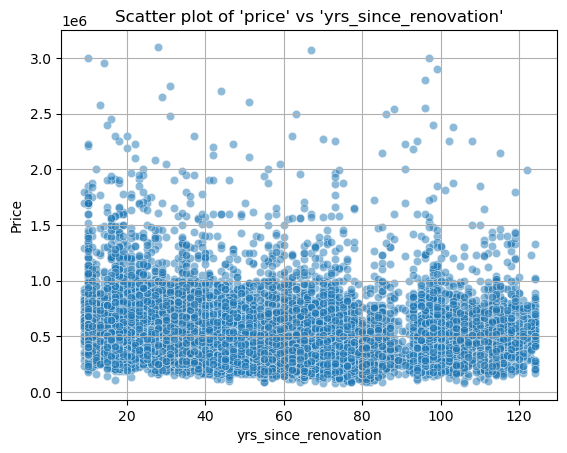

Correlation coefficient between 'price' and 'age_of_house': -0.018566980767651578


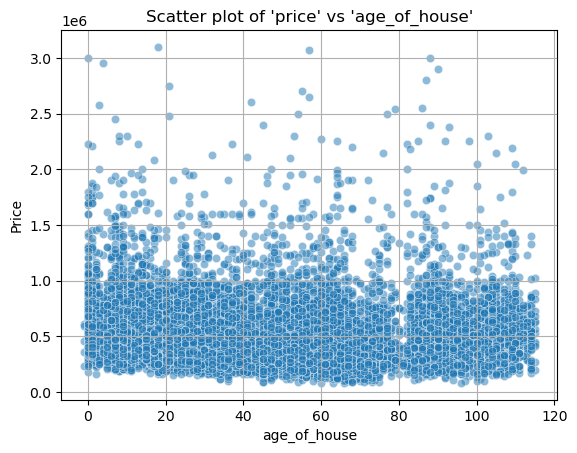

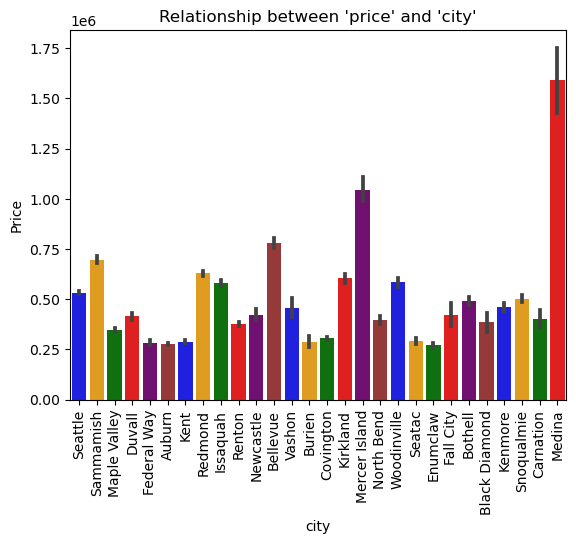

In [26]:
def correlation_and_barplots(data, discrete_columns, exclude_columns=[]):
    for col in data.columns:
        if col in discrete_columns:
            custom_palette = ["blue", "orange", "green", "red","purple","brown"]
            sns.barplot(data=data, x=col, y='price',palette=custom_palette)
            plt.title(f"Relationship between 'price' and '{col}'")
            plt.xlabel(col)
            plt.ylabel('Price')
            plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
            plt.show()
        elif pd.api.types.is_numeric_dtype(data[col]) and col not in exclude_columns:
            correlation = data['price'].corr(data[col])
            print("=================================================================================")
            print(f"Correlation coefficient between 'price' and '{col}': {correlation}")
            print("=================================================================================")
            sns.scatterplot(data=data, x=col, y='price', alpha=0.5)
            plt.title(f"Scatter plot of 'price' vs '{col}'")
            plt.xlabel(col)
            plt.ylabel('Price')
            plt.grid(True)
            plt.show()

exclude = ['yr_renovated', 'price', 'view_rating', 'condition_rating', 'lat', 'long', 'waterfront_bool', 'zipcode']
discrete_columns = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'waterfront', 'city']
correlation_and_barplots(clean_data, discrete_columns, exclude_columns=exclude)


### 1.1 More on Correlation
> Let's use a heatmap to further our understanding of the relationship between price and other features.

The following columns were dropped due to being object types:
['waterfront', 'view', 'condition', 'city']


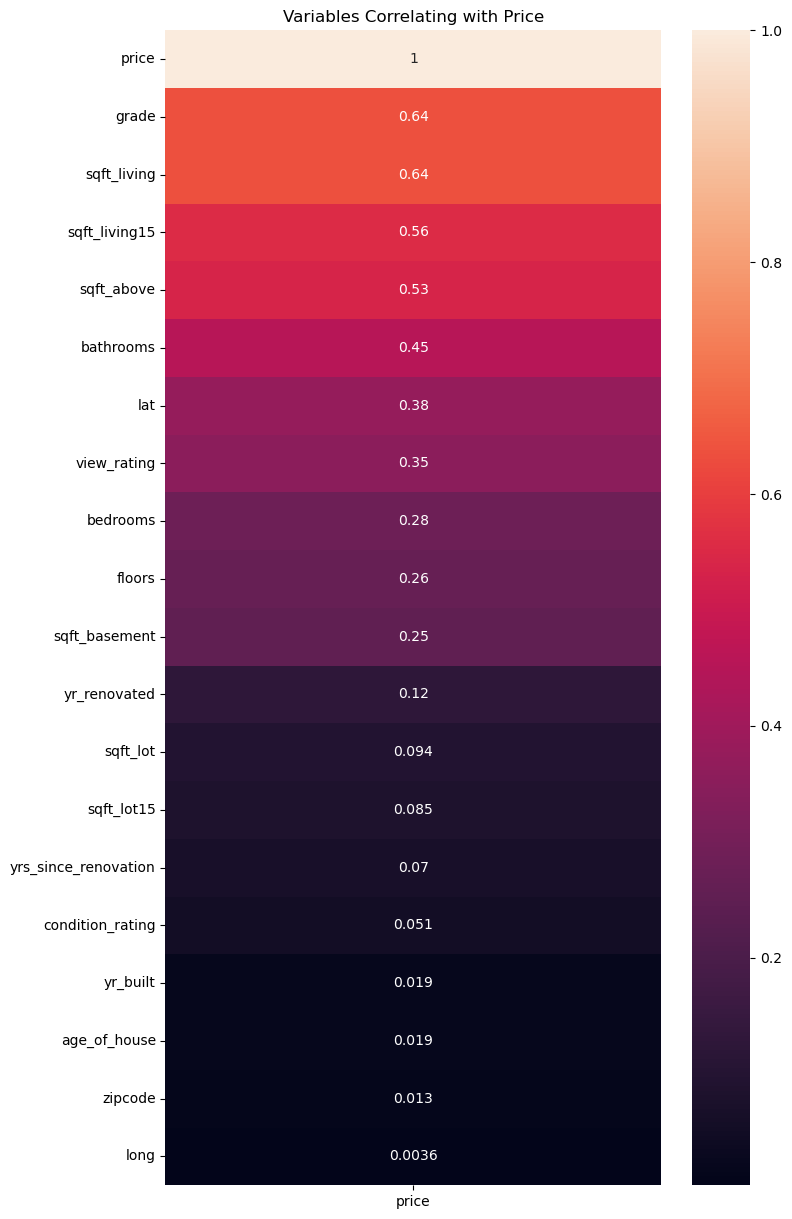

In [27]:
def correlation(df,column=None,rank=None):
    '''
    performs correlation matrix, drops non numeric object types
    variables are dataframe, column, and ranking
    ranking is optional
    column = 'column'
    rank = True for # rank 1,2,3...
    
    '''
    # Redundant check. Makes sure all columns of object type are dropped
    df_object = df.select_dtypes(include='object')
    print(f'The following columns were dropped due to being object types:\n{df_object.columns.tolist()}')
    df = df.drop(df_object,axis=1) 
    df1 = df
    if rank is True:
        try:
            df_corr = df1.corr()[column]
            df_corr = df_corr.drop(column)
            print(f'Ranked correlation to {column}')
            return(df_corr.rank(ascending=False).sort_values())
        except:
            df_corr = df1.corr()
            return(df_corr.rank(ascending=False))
    else:    
        try:
            df_corr = df.corr()[column]
            df_corr = df_corr.drop(column)
            print(f'Correlation to {column}')
            return(df_corr.sort_values(ascending=False))
        except:
            df_corr = df1.corr()
            return(df_corr)

# Getting the correlation between variables
df_corr = abs(correlation(clean_data))
fig, ax = plt.subplots(figsize=(8,15))
sns.heatmap(df_corr[['price']].sort_values(by='price',ascending=False),annot = True)

ax.set_title('Variables Correlating with Price');
# plt.savefig('Group_plots/correlation_plot.png', dpi=100)

>**Summary:** Continuous data with the highest correlations with price include : `sqft_living`, `sqft_above`, `sqft_living15` while those with the lowest correlations include: `sqft_lot`, `yr_built`, `sqft_lot15` and `yrs_since_renovated`. `sqft_basement` has a moderate correlaton.

>For the discrete data; increase in `bedrooms`,`bathrooms`, `grade`, and `waterfront` seem to show a correlational increase in the median price as well as a greater spread of prices in some cases. While features such as `condition`, `view` and `floors` showed an increase to a certain extent indicating that there is an optimum value for these features.

### 1.2 Multicollinearity

In [28]:
# Create a function to check for multicollinearity
corr_with_price = df_corr[['price']].sort_values(by='price',ascending=False)

Multicollinear_Features = []
Multicollinear_Corr = []

def check_multicollinearity(feature):
    for idx, correlation in df_corr[feature].T.items():
        if correlation >= .80 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in df_corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by='Correlations', ascending=False)
print('Multicollinear Features')
display(MC_df)
print('Correlations with Price')
display(corr_with_price)

Multicollinear Features


Correlations                              Features
4      0.999873              [yr_built, age_of_house]
8      0.999873              [age_of_house, yr_built]
7      0.914201  [yrs_since_renovation, age_of_house]
9      0.914201  [age_of_house, yrs_since_renovation]
3      0.914176      [yr_built, yrs_since_renovation]
6      0.914176      [yrs_since_renovation, yr_built]
0      0.856004             [sqft_living, sqft_above]
2      0.856004             [sqft_above, sqft_living]
1      0.811805                [sqft_lot, sqft_lot15]
5      0.811805                [sqft_lot15, sqft_lot]

Correlations with Price


price
price                 1.000000
grade                 0.636755
sqft_living           0.635694
sqft_living15         0.556182
sqft_above            0.534574
bathrooms             0.453108
lat                   0.375776
view_rating           0.353736
bedrooms              0.283225
floors                0.264618
sqft_basement         0.252526
yr_renovated          0.124791
sqft_lot              0.094061
sqft_lot15            0.084900
yrs_since_renovation  0.069725
condition_rating      0.051412
yr_built              0.018851
age_of_house          0.018567
zipcode               0.013115
long                  0.003648

> **Summary:**
> 
> `sqft_living` and `sqft_above` features are highly correlated to each other to each other so we can choose to do away with one of the two features which is less correlated with the target variable `price`.We will do away with `sqft_above`.

> `sqft_lot` and `sqft_lot15` are highly correlated with each other so we can choose one of the features that is highly correlated with `price` the target variable which is `sqft_lot`.

> If `yr_built` and `age_of_house` are highly correlated, it's not surprising since age_of_house is essentially derived from yr_built. They convey the same information in different forms. In this case, you would typically choose to keep only one of them.We will do away with `yr_built`.

> `yr-renovated` and `yr_built` are highly correlated with each other but `yrs_since_renovated` is highly correlated `price` so we will keep it.

In [29]:
clean_data.drop(columns = ['sqft_above','sqft_lot15','yr_built','date','zipcode'], inplace = True)

# Data Modeling
***
## Predicting Housing Prices in King County
### Base Predictor Model: Simple Linear Regression(SLR)

> First let's import the necessary libraries and tools for statistical modeling.

In [30]:
import statsmodels .api as sm
from scipy import stats
from statsmodels.stats.diagnostic import het_goldfeldquandt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import linregress

> We then create a function that builds a simple linear regression model using OLS method.

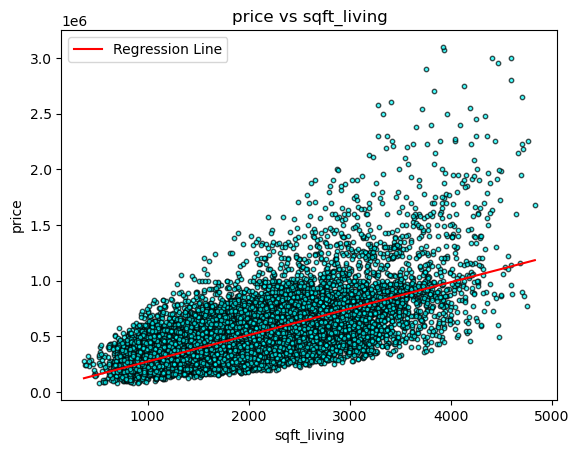

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     9868.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        14:58:42   Log-Likelihood:            -1.9969e+05
No. Observations:               14554   AIC:                         3.994e+05
Df Residuals:                   14552   BIC:                         3.994e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.483e+04   5092.994      6.839      

In [31]:
def visualize_regression(clean_data, column1, column2):
    """
    Visualizes a linear regression model between two columns of a given dataset.

    Parameters:
        clean_data (DataFrame): The cleaned dataset containing the columns for analysis.
        column1 (str): The name of the independent variable column.
        column2 (str): The name of the dependent variable column.

    Returns:
        None. Displays a plot of the regression line and data points."""
    
    # title = input("Enter the title for the model: ")
    # xlabel = input("Enter the xlabel for the model: ")
    # ylabel = input("Enter the ylabel for the model: ")
    
    X = clean_data[[column1]]
    y = clean_data[column2] 
    
    # Fit OLS model
    baseline_results = sm.OLS(y, sm.add_constant(X)).fit()
    summary = baseline_results.summary()
    # Generate predicted values
    x = np.linspace(clean_data[column1].min(), clean_data[column1].max(), 100)
    Y_predicted = baseline_results.params[0] + baseline_results.params[1] * x
    
    # Plot regression line and data points
    plt.plot(x, Y_predicted, color='red', label='Regression Line')
    plt.scatter(clean_data[column1], y, color='cyan', alpha=0.7, s=10, edgecolors='black')
    plt.xlabel(f"{column1}")
    plt.ylabel(f"{column2}")
    plt.title(f"{column2} vs {column1}")
    plt.legend()
    plt.show()
    return print(summary)

# Example usage:
visualize_regression(clean_data, 'sqft_living', 'price')

> The coefficient represents the estimated intercept of the regression line. In this case, the intercept is approximately 34,830. This means that when the square footage of living space (`sqft_living`) is zero (which may not be practically meaningful), the estimated price of the property is around $34,830.

> The coefficient for `sqft_living` is approximately 237.75. This indicates that for each additional square foot of living space, the estimated price of the property increases by approximately $237.75, holding other variables constant.

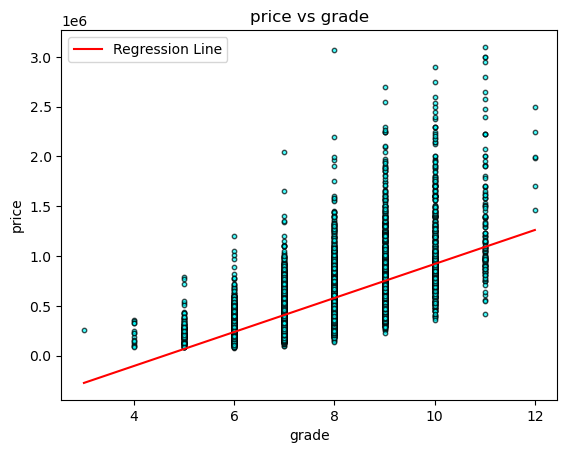

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     9924.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        14:58:42   Log-Likelihood:            -1.9968e+05
No. Observations:               14554   AIC:                         3.994e+05
Df Residuals:                   14552   BIC:                         3.994e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -7.85e+05   1.31e+04    -59.929      0.0

In [32]:
visualize_regression(clean_data,'grade','price')

> The coefficient for `grade` is approximately 170,600. This indicates that for each unit increase in the `grade` variable, the estimated price of the property increases by approximately $170,600, holding other variables constant.

### Model 2: Multiple linear Regression Approach(MLR)
> Next we'll do a regression analysis with multiple features from the king county housing dataset.

In [34]:
# Assigning price for the dependent variable and other features as the independent variables
y = clean_data['price']
X_iterated = clean_data[['bedrooms','bathrooms','sqft_living','sqft_lot',
                        'floors','sqft_basement','yr_renovated','sqft_living15',
                        'condition_rating','yrs_since_renovation','view_rating','age_of_house']]

iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
# Fitting the model with a regression line
iterated_results = iterated_model.fit()
# Getting the summary of the model
iterated_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1421.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        14:59:46   Log-Likelihood:            -1.9782e+05
No. Observations:               14554   AIC:                         3.957e+05
Df Residuals:                   14541   BIC:                         3.958e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.799e+05   1.28e+04    -21.796      0.000   -3.05e+05   -2.55e+05
bedrooms             -4.791e+04   2423.288    -19.772      0.000   -5.27e+04   -4.32e+04
bathrooms             5.156e+04   4039.861     12.763      0.000    4.36e+04    5.95e+04
sqft_living            188.1018      4.563     41.225      0.000     179.158     197.045
sqft_lot                -1.2378      0.143     -8.674      0.000      -1.517      -0.958
floors                6.811e+04   4249.229     16.029      0.000    5.98e+04    7.64e+04
sqft_basement           -1.3475      5.369     -0.251      0.802     -11.872       9.177
yr_renovated            32.5094     10.640      3.055      0.002      11.653      53.365
sqft_living15           95.9718      4.187     22.919      0.000      87.764     104.180
condition_rating      2.299e+04   2762.950      8.322      0.000    1.76e+04    2.84e+04
yrs_since_renovation   342.7365    349.516      0.981      0.327    -342.360    1027.833
view_rating           6.894e+04   2486.285     27.729      0.000    6.41e+04    7.38e+04
age_of_house          2379.1855    344.364      6.909      0.000    1704.188    3054.183
==============================================================================
Omnibus:                     5785.359   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53818.289
Skew:                           1.653   Prob(JB):                         0.00
Kurtosis:                      11.821   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***

> Based on the provided OLS regression results;<br>
>
>**R-squared:** The R-squared value is 0.540, indicating that approximately 54% of the variance in housing prices is explained by the independent variables included in the model.<br>
**Coefficients:**<br>
    1. `bedrooms`: Each additional bedroom is associated with a decrease in housing prices by approximately 47,910, holding other variables constant.<br>
    2. `bathrooms`: Each additional bathroom is associated with an increase in housing prices by approximately 51,560, holding other variables constant.<br>
    3. `floors`: Each additional floor is associated with an increase in housing prices by approximately 68,110, holding other variables constant.<br>
    4. `condition_rating`: Each unit increase in the condition rating is associated with an increase in housing prices by approximately 22,990, holding other variables constant.<br>
**P-values:** Most of the coefficients have p-values less than 0.05, indicating that they are statistically significant predictors of housing prices. However, coefficients for `sqft_basement` and `yrs_since_renovated` are not statistically significant at the 0.05 level.
>
> **Overall Significance:** As we add more features, the R-squared has also increased meaning that our model's accuracy has increased.

### Model 3: One-Hot Encoded Multiple Linear Regression(One-Hot MLR)
> Let's use One-Hot Encoding to convert our categorical variables into numerical values that can be used in our third model.

In [35]:
clean_data['city'].value_counts()

Seattle          5872
Auburn            960
Bellevue          892
Renton            796
Kirkland          678
Redmond           645
Sammamish         515
Issaquah          486
Kent              470
Maple Valley      391
Covington         390
Woodinville       314
Newcastle         296
Seatac            291
Federal Way       210
Kenmore           202
Snoqualmie        198
Mercer Island     165
North Bend        137
Bothell           134
Enumclaw          129
Duvall            108
Carnation          64
Vashon             60
Black Diamond      56
Burien             40
Fall City          33
Medina             22
Name: city, dtype: int64

In [37]:
y = clean_data['price']
X = clean_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','city',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated', 'sqft_living15','yrs_since_renovation', 'age_of_house']]

X = pd.get_dummies(X, columns=['floors','bedrooms','waterfront', 'view', 'condition', 'grade','city'], dtype=int)
columns_to_drop = ['bedrooms_1', 'floors_1.0','waterfront_NO', 'view_AVERAGE','condition_Average', 'grade_5','city_Seattle']

# Drop columns from X
X.drop(columns=columns_to_drop, inplace=True)

# Store dropped columns in a list
reference_variables = columns_to_drop

# Add constant term to the predictor variables
X = sm.add_constant(X)

# Make sure the indices are aligned
y = y[X.index]

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print summary statistics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     668.3
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        15:00:22   Log-Likelihood:            -1.9372e+05
No. Observations:               14554   AIC:                         3.876e+05
Df Residuals:                   14492   BIC:                         3.880e+05
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.284e+04      2e+04      2.144      0.032    3682.359     8.2e+04
bathrooms             3.702e+04   3110.850     11.900      0.000    3.09e+04    4.31e+04
sqft_living            120.4816      3.863     31.192      0.000     112.910     128.053
sqft_lot                -0.2468      0.118     -2.099      0.036      -0.477      -0.016
sqft_basement          -19.1478      4.438     -4.315      0.000     -27.846     -10.450
yr_renovated             6.4115      8.100      0.792      0.429      -9.466      22.289
sqft_living15           34.2203      3.500      9.777      0.000      27.360      41.081
yrs_since_renovation  -491.2447    266.246     -1.845      0.065   -1013.121      30.632
age_of_house          2188.4306    263.503      8.305      0.000    1671.931    2704.930
floors_1.5            2.156e+04   4962.086      4.345      0.000    1.18e+04    3.13e+04
floors_2.0            2.053e+04   4135.543      4.965      0.000    1.24e+04    2.86e+04
floors_2.5            7.718e+04   1.63e+04      4.741      0.000    4.53e+04    1.09e+05
floors_3.0            5.631e+04   8771.302      6.420      0.000    3.91e+04    7.35e+04
bedrooms_2            1.208e+04   1.37e+04      0.881      0.378   -1.48e+04    3.89e+04
bedrooms_3           -7611.1596   1.37e+04     -0.556      0.578   -3.44e+04    1.92e+04
bedrooms_4            -3.04e+04    1.4e+04     -2.170      0.030   -5.79e+04   -2936.826
bedrooms_5           -4.873e+04   1.48e+04     -3.285      0.001   -7.78e+04   -1.97e+04
bedrooms_6           -6.716e+04   1.89e+04     -3.555      0.000   -1.04e+05   -3.01e+04
waterfront_YES         3.57e+05   2.12e+04     16.846      0.000    3.15e+05    3.99e+05
view_EXCELLENT        1.748e+05   1.55e+04     11.242      0.000    1.44e+05    2.05e+05
view_FAIR             1.996e+04   1.18e+04      1.692      0.091   -3164.300    4.31e+04
view_GOOD             6.479e+04   1.11e+04      5.855      0.000    4.31e+04    8.65e+04
view_NONE            -6.279e+04   6546.232     -9.592      0.000   -7.56e+04      -5e+04
condition_Fair       -3.063e+04   1.41e+04     -2.177      0.030   -5.82e+04   -3045.533
condition_Good        2.556e+04   3160.082      8.087      0.000    1.94e+04    3.18e+04
condition_Very Good   6.641e+04   4991.787     13.304      0.000    5.66e+04    7.62e+04
grade_3               1.412e+05   1.48e+05      0.955      0.340   -1.49e+05    4.31e+05
grade_4               2.883e+04   4.01e+04      0.718      0.473   -4.99e+04    1.08e+05
grade_6               2636.3766   1.29e+04      0.205      0.838   -2.26e+04    2.79e+04
grade_7               6.664e+04   1.27e+04      5.232      0.000    4.17e+04    9.16e+04
grade_8               1.248e+05   1.32e+04      9.432      0.000    9.88e+04    1.51e+05
grade_9               2.397e+05   1.41e+04     16.987    

> There is a notable difference in the R-squared value after one-hot encoding categorical variables. This is attributed to the following:<br>
>
> **1. Additional Variables:** It appears that the OLS regression model includes a larger number of predictor variables compared to the initial MLR model. By adding more predictor variables, the OLS model captures additional variability in the dependent variable (`price`), leading to a higher R-squared value.<br>
**2. 
Categorical Variables**: One-hot encoding categorical variable) creatse multiple binary variables, each representing a category. This expansion of variables can increase the complexity of the model and potentially capture more variation in the dependent variable, thus contributing to a higher R-squared value<br>
**3. Model Specification:** Differences in the specification of the regression model, the exclusion of `reference_variables` in the case of our model, might have affected the goodness of fit and consequently the R-squared value.

In [38]:
from sklearn.metrics import mean_squared_error

# Obtain predicted prices
predicted_prices = results.predict(X)

# Calculate the squared differences
squared_diffs = (y - predicted_prices) ** 2

# Calculate the mean squared error
mse = squared_diffs.mean()

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 146039.50190100778


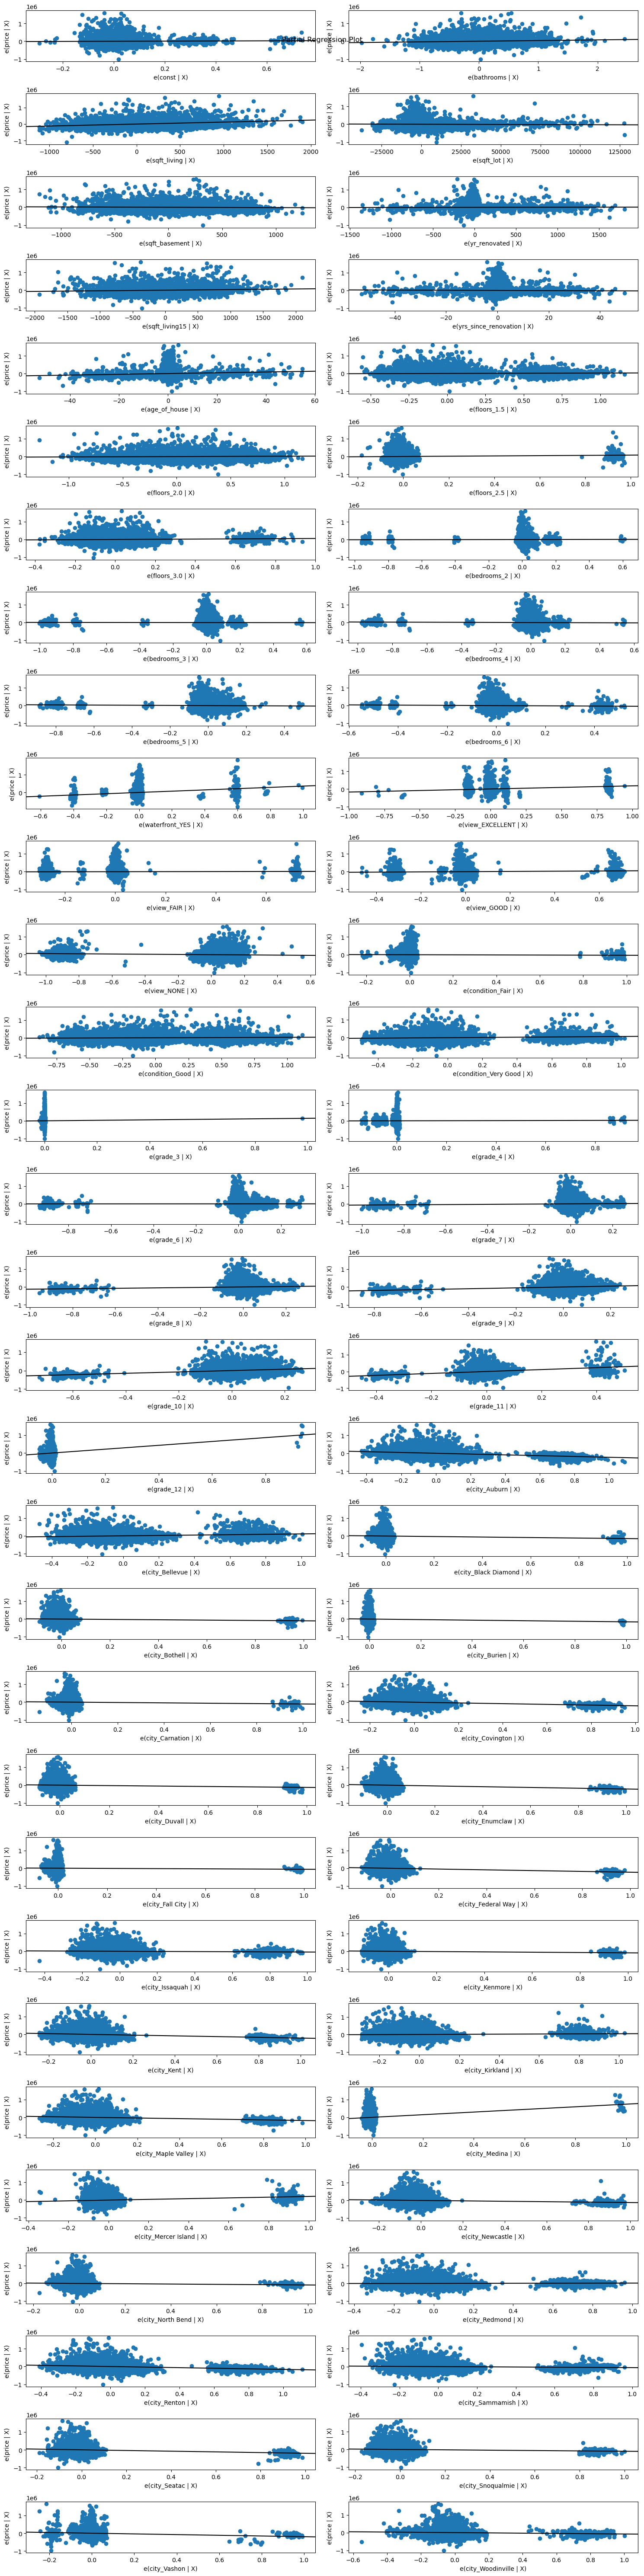

In [39]:
# create partial regression plots for each predictor variable
fig = plt.figure(figsize=(15, 60))
sm.graphics.plot_partregress_grid(results, fig=fig)
plt.tight_layout()
plt.show()

#### Assumptions on Linearity
#### 1. Homoscedasticity Test
> **Goldfeld-Quandt Test:** The Goldfeld-Quandt test is used to test for heteroscedasticity by splitting the data into two groups based on a certain criterion (e.g. median of an independent variable) and comparing the variances of the residuals between the two groups. The ratio of the second group's mse_resid divided by the first group's mse_resid becomes a statistic that can be compared to the f-distribution to find a p-value.

In [40]:
het_goldfeldquandt(y, X.values, alternative='two-sided')

(1.1001788120392453, 5.0347676618172275e-05, 'two-sided')

> We have a p-value of about `3.6902701642833185e-07`, so we reject the null hypothesis at an alpha of 0.05. This means we consider the King County House data to be heteroscedastic. This violates one of the key assumptions of linear regression, which assumes homoscedasticity, where the variance of the errors is constant.

##### Assess the assumption of homoscedasticity in our MLR model

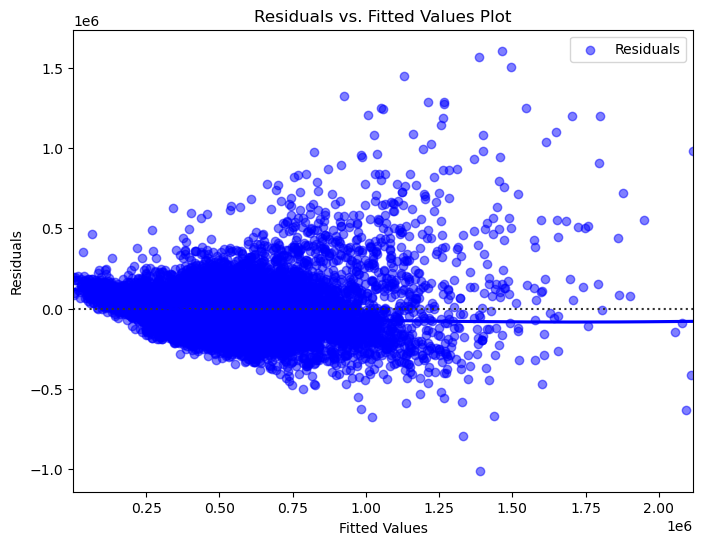

In [41]:
# Get the predicted values and residuals
predicted_values = results.predict()
residuals = results.resid

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(8, 6))
sns.residplot(x=predicted_values, y=residuals, lowess=True, scatter_kws={'alpha': 0.5}, color='blue', label='Residuals')
plt.title('Residuals vs. Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

Slope: -3.4178451580178324e-14
Intercept: -2.55137976662778e-07
Correlation: (r) -5.732605001372171e-14


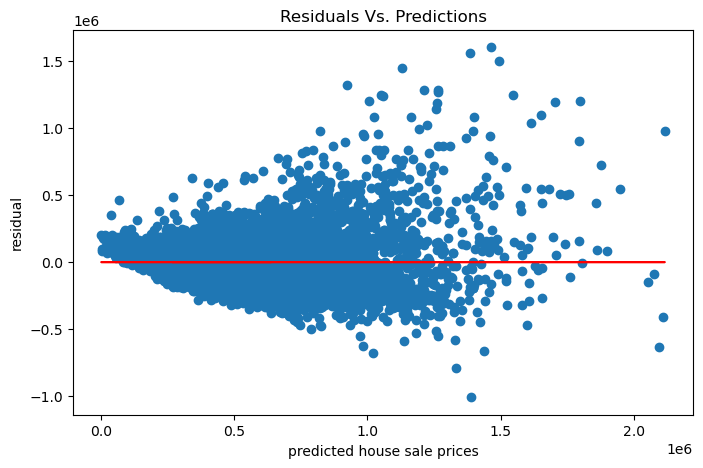

In [42]:
# Creating model for testing homoscedasticity
residuals = results.resid
predicted_values  = results.predict()

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(predicted_values, residuals)

slope, intercept, r, p, se = linregress(predicted_values,residuals)
lin_r = linregress(predicted_values, residuals)
plt.plot(predicted_values, lin_r.intercept + lin_r.slope*predicted_values, 'r')

print('Slope:', slope)
print('Intercept:', intercept)
print('Correlation: (r)', r)

ax.set_xlabel('predicted house sale prices')
ax.set_ylabel('residual')
ax.set_title('Residuals Vs. Predictions');

#### 2. Independence Test

- Check if errors are independent
- Create scatter plot of residuals and target values
- Evaluate and identify patterns
- Check Durbin-Watson Statistic

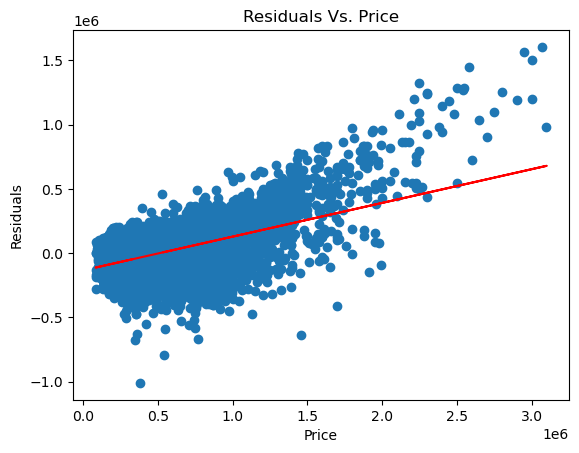

In [43]:
Y = clean_data['price']
fig, ax = plt.subplots()
ax.scatter(Y, residuals)

slope, intercept, r, p, se = linregress(Y,residuals)
lin_r = linregress(Y, residuals)
plt.plot(Y, lin_r.intercept + lin_r.slope*Y, 'r')

ax.set_xlabel('Price')
ax.set_ylabel('Residuals')
ax.set_title('Residuals Vs. Price');

> Upward trend in the above scatter plot indicates positive correlation in the errors.

##### Durbin-Watson
> Checks for autocorrelation in the residuals. Autocorrelation occurs when residuals are not independent.The range is from 0-4

In [44]:
results.summary().tables[2]

<class 'statsmodels.iolib.table.SimpleTable'>

> Values close to 2 indcate no significant autocorrelation (1.5 - 2.5)

#### 3. Normality test

> Q-Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other

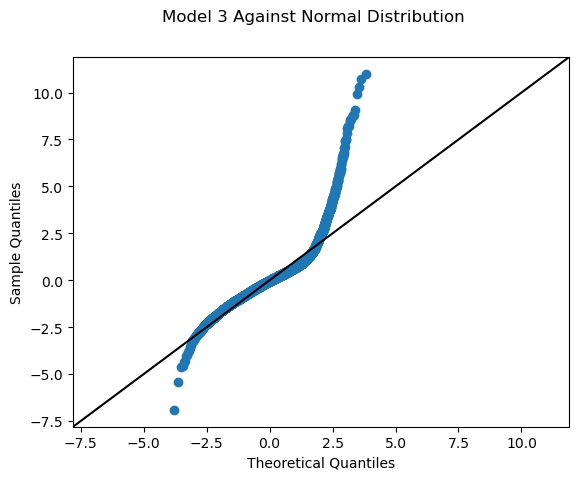

In [45]:
# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("Model 3 Against Normal Distribution");

> The middle part of the plot looks okay, but the ends, especially the higher end, are diverging from a normal distribution. When you see diverging behavior, especially at the ends of the QQ plot, it suggests that the tails of the residual distribution are heavier or lighter than those of a normal distribution. Specifically, if the points on the QQ plot deviate upward at the higher end, it indicates heavier tails (positive skewness).

Based on our assumption tests:
- The model passes Durbin Watson test for independence.
- Our autocorrelation from the Durbin-Watson test indicates a little to no signifcant autocorrelation.
- Possible positive auto correlation.
- Fails Omnibus thus has violated the normality assumption.
- QQ plot and Kurtosis indiacates large tails, this is likley due to large outliers.
- **Prob(Omnibus):** This is the p-value associated with the Omnibus test. A value less than 0.05 indicates that the residuals are not normally distributed.
- **Cond. No.:** This is the condition number, which measures the multicollinearity in the independent variables. A higher condition number (e.g., 4.40e+06) indicates stronger multicollinearity among the independent variables.
- **Kurtosis:** Kurtosis measures the "tailedness" of the distribution of residuals. A kurtosis value of 10.324 suggests heavy tails or outliers in the distribution.
- **Prob(JB):** This is the p-value associated with the Jarque-Bera test. Similar to the Omnibus test, a value less than 0.05 indicates non-normality of residuals.
- So our model indicate a positive autocorrelation and the Durbin-Watson value  indicate there is no significant autocorrelation. Our model indicates a positive autocorrelation, it suggests that there might be a systematic pattern in the residuals, meaning that the errors in the model are not independent. This violates one of the assumptions of linear regression.

### Model 4: Log-Transformed Multiple Linear Regression(Log-MLR)

In [47]:
y = np.log(clean_data['price'])
# Assigning all the independent variables to X
X_vals = clean_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','city',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated', 'sqft_living15', 'yrs_since_renovation', 'age_of_house']]

# One hot encoding for all categorical variables

X_vals = pd.get_dummies(X_vals, columns=['floors','bedrooms','waterfront', 'view', 'condition', 'grade','city'], dtype=int)
columns_to_drop = ['bedrooms_1', 'floors_1.0', 'view_AVERAGE','condition_Average', 'grade_5','city_Seattle','waterfront_NO']
X_vals.drop(columns=columns_to_drop, inplace=True)

# Store dropped columns in a list
reference_variables = columns_to_drop
# Add constant term to the predictor variables
X = sm.add_constant(X_vals)

# Make sure the indices are aligned
y = y[X.index]

# Fit the OLS model
log_model = sm.OLS(y, X)
X_log_iterated_results = log_model.fit()

# Print summary statistics
X_log_iterated_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     860.0
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        15:02:16   Log-Likelihood:                 858.39
No. Observations:               14554   AIC:                            -1593.
Df Residuals:                   14492   BIC:                            -1122.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.9460      0.031    382.836      0.000      11.885      12.007
bathrooms                0.0685      0.005     14.102      0.000       0.059       0.078
sqft_living              0.0002   6.03e-06     31.457      0.000       0.000       0.000
sqft_lot              8.594e-08   1.84e-07      0.468      0.640   -2.74e-07    4.46e-07
sqft_basement        -2.624e-05   6.93e-06     -3.786      0.000   -3.98e-05   -1.27e-05
yr_renovated          2.038e-06   1.27e-05      0.161      0.872   -2.28e-05    2.68e-05
sqft_living15         9.298e-05   5.47e-06     17.009      0.000    8.23e-05       0.000
yrs_since_renovation    -0.0008      0.000     -1.941      0.052      -0.002    7.92e-06
age_of_house             0.0037      0.000      8.880      0.000       0.003       0.004
floors_1.5               0.0656      0.008      8.461      0.000       0.050       0.081
floors_2.0               0.0455      0.006      7.048      0.000       0.033       0.058
floors_2.5               0.0794      0.025      3.124      0.002       0.030       0.129
floors_3.0               0.1204      0.014      8.785      0.000       0.094       0.147
bedrooms_2               0.0376      0.021      1.756      0.079      -0.004       0.080
bedrooms_3               0.0049      0.021      0.231      0.817      -0.037       0.047
bedrooms_4              -0.0170      0.022     -0.774      0.439      -0.060       0.026
bedrooms_5              -0.0642      0.023     -2.769      0.006      -0.110      -0.019
bedrooms_6              -0.0759      0.030     -2.572      0.010      -0.134      -0.018
waterfront_YES           0.3307      0.033      9.992      0.000       0.266       0.396
view_EXCELLENT           0.1355      0.024      5.581      0.000       0.088       0.183
view_FAIR                0.0203      0.018      1.103      0.270      -0.016       0.056
view_GOOD                0.0427      0.017      2.472      0.013       0.009       0.077
view_NONE               -0.0914      0.010     -8.942      0.000      -0.111      -0.071
condition_Fair          -0.1553      0.022     -7.064      0.000      -0.198      -0.112
condition_Good           0.0501      0.005     10.148      0.000       0.040       0.060
condition_Very Good      0.1121      0.008     14.377      0.000       0.097       0.127
grade_3                  0.4885      0.231      2.115      0.034       0.036       0.941
grade_4                 -0.0589      0.063     -0.939      0.348      -0.182       0.064
grade_6                  0.1161      0.020      5.771      0.000       0.077       0.156
grade_7                  0.3366      0.020     16.920      0.000       0.298       0.376
grade_8                  0.4761      0.021     23.043      0.000       0.436       0.517
grade_9                  0.6167      0.022     27.977    

#### **Normality Test after Log Transformation**

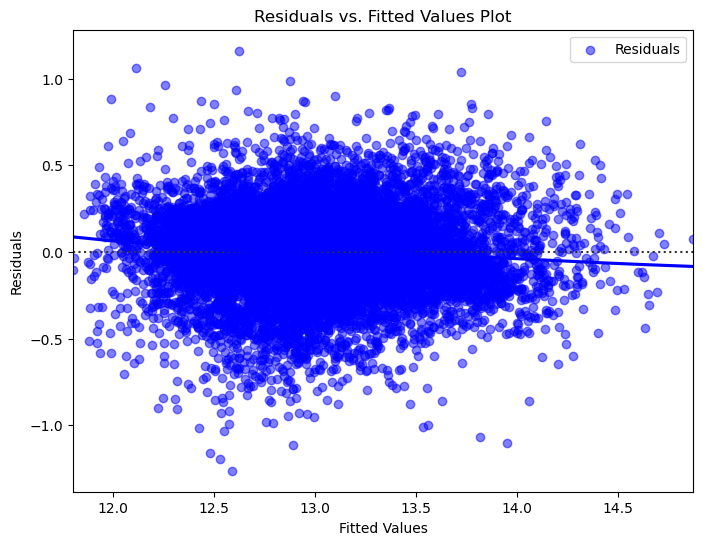

In [48]:
# Get the predicted values and residuals
predicted_values = X_log_iterated_results.predict()
residuals = X_log_iterated_results.resid

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(8, 6))
sns.residplot(x=predicted_values, y=residuals, lowess=True, scatter_kws={'alpha': 0.5}, color='blue', label='Residuals')
plt.title('Residuals vs. Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

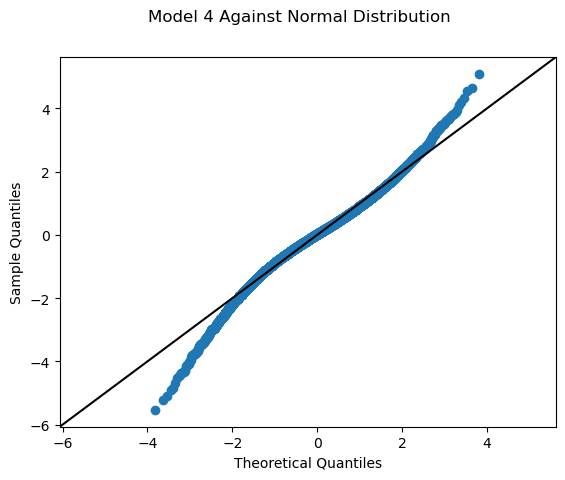

In [49]:
# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(X_log_iterated_results.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("Model 4 Against Normal Distribution");

## Model Evaluation

> Model 4 has passed the normality test and has increased in its R-squared value. Let's calculate the RMSE to determine if indeed it is best model to use for our project.

In [50]:
from sklearn.metrics import mean_squared_error

# Obtain predicted log-transformed prices
predicted_log_prices = X_log_iterated_results.predict(X)

# Calculate the squared differences
squared_diffs = (y - predicted_log_prices) ** 2

# Calculate the mean squared error
mse = squared_diffs.mean()

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE:", rmse)

RMSE: 0.22811209516164163


> Model 3 has a higher RMSE of `172221.2583885908` compared to Model 4 which has a RMSE of `0.3022692781936056`. In general, a lower RMSE (Root Mean Squared Error) indicates better predictive performance of the model. A lower RMSE suggests that the model's predictions are closer to the actual values on average. This indicates better accuracy in estimating the target variable.
>
> Therefore our best pick would be the `Log-Transformed Multiple Linear Regression Model`.

# Regression Results
***

In the log-transformed multiple linear regression model, the coefficients represent the change in the natural logarithm of the price for a one-unit change in each predictor variable, holding all other variables constant.

Here's a summarized interpretation of the results, highlighting the features that have the highest impact on housing prices:

1. The **`average price`** of a house is **$150K**.

2. Houses with a **`waterfront`** have a **33% higher price** than houses with **`no waterfront`**.
3. Houses with **`excellent views`** have  a **14% higher price** than houses with **`average views`**.
4. Houses with very **`good conditions`** have a **11% higher price** compared to houses with **`average conditions`**.
5. **One additional `bathroom`** will result in **7% increase in `price`**.
6. Houses with **2 `bedrooms`** have a **4% increase in `price`** than houses with **one `bedroom`** however houses with **more than 4 `bedrooms`** have a **decrease in `price`** compared to houses with **one `bedroo`m**.
7. The **higher the `grade` the higher the `price`** as houses with **`grade 12`(Luxury)** have a **100% higher `price`** than houses with **`grade 5`(Fair)**.
8. Houses in **Medina city** have the **highest `price`** , **62% higher** than houses in **Seattle**

9.  Houses in **Mercer Island** have a **25% higher `price`** and houses in **Bellevue** have a **16% higher `price`**.

**Interpreting Coefficients**

In [51]:
# Exponentiate the coefficients
exp_coefficients = np.exp(X_log_iterated_results.params)

# Calculate the percentage change for a one percent increase in each independent variable
percent_change = (exp_coefficients ** 0.01 - 1) * 100

# Print the results
for i, coef in enumerate(exp_coefficients):
    print(f"For a one percent increase in independent variable {X.columns[i]}, the price changes by approximately {percent_change[i]:.2f}%.")

For a one percent increase in independent variable const, the price changes by approximately 12.69%.
For a one percent increase in independent variable bathrooms, the price changes by approximately 0.07%.
For a one percent increase in independent variable sqft_living, the price changes by approximately 0.00%.
For a one percent increase in independent variable sqft_lot, the price changes by approximately 0.00%.
For a one percent increase in independent variable sqft_basement, the price changes by approximately -0.00%.
For a one percent increase in independent variable yr_renovated, the price changes by approximately 0.00%.
For a one percent increase in independent variable sqft_living15, the price changes by approximately 0.00%.
For a one percent increase in independent variable yrs_since_renovation, the price changes by approximately -0.00%.
For a one percent increase in independent variable age_of_house, the price changes by approximately 0.00%.
For a one percent increase in independe

## Insights

### Based on the analysis conducted on the King County House Sales dataset, we have gathered several insights:
***
####  1. Key Factors Affecting House Prices:
* Square footage of living space appears to have the most significant impact on house prices, as evidenced by its high correlation with price.
* Other features such as square footage of living space, grade, waterfront status, and year of renovation also show notable correlations with house prices, indicating their influence on property values.

#### 2. Significance of Property Characteristics:
* The number of bedrooms and bathrooms also plays a role in determining house prices, although their individual impacts may vary.
* Renovation status can affect house prices, with recently renovated properties likely commanding higher values.

#### 3. Neighborhood and Environmental Factors:
* Proximity to amenities seems to correlate positively with house prices, suggesting that location plays a crucial role in property valuation.
* Waterfront properties are associated with premium prices, indicating the desirability of waterfront locations among buyers.
* Other neighborhood factors such as view and property condition also contribute to variations in house prices.

#### 4. Modeling and Predictive Insights:
* Various regression models, including Simple Linear Regression and Multiple Linear Regression, have been applied to understand the relationships between independent variables and house prices.
* Iterative modeling and feature engineering have helped refine the predictive accuracy of the models, allowing for better insights into the factors influencing house prices.
* Logarithmic transformations have been utilized to address skewness and improve the linearity of relationships between variables.

# Conclusion
***
### In addition to the insights gathered, it's essential to consider the limitations of this analysis:
* The dataset used for this analysis was limited to a specific geographic area and time period. It may not be representative of other locations or time periods, which could limit the generalizability of the results.
* The data in the dataset is from 2014 and 2015. Therefore, it may not be able to account for changes in the housing market since then. As a result, the model may not accurately predict the value of a house in 2024.
* While the model can identify relationships between variables, it cannot prove causality. Therefore, it's important to be cautious about making causal claims based solely on the results of this model.
* Overall, the analysis provides valuable insights for homeowners, real estate professionals, and potential buyers interested in the King County housing market. By understanding the key factors affecting house prices and acknowledging the limitations of the analysis, stakeholders can make informed decisions regarding pricing strategies, property enhancements, and investment opportunities. Further research and analysis may be warranted to explore additional factors or refine existing models for better predictive accuracy actionable insights.
***